<a href="https://colab.research.google.com/github/IamRash-7/picPicker-server/blob/master/picPicker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import base64
def get_cv2_image_from_base64_string(b64str):
    encoded_data = b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

In [ ]:
img1 = get_cv2_image_from_base64_string("data:image/jpeg;base64,/9j/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAGwAwADASIAAhEBAxEB/8QAHQAAAgIDAQEBAAAAAAAAAAAAAQIAAwQFBgcICf/EAFIQAAEDAwIFAQYDBQUFBQQIBwEAAhEDBCEFMQYSQVFhcQcTIoGRoRQysQhCwdHwFSNSYuEzcoKS8RYXQ6KyJCVjwidTVHODk7PSJjRERZSk4v/EABwBAAIDAQEBAQAAAAAAAAAAAAABAgQFAwYHCP/EADYRAAICAQMCBAMGBwEAAwEAAAABAhEDBBIhBTETQVFhFCJxIzKBsdHwBhUzkaHB4UIkUvGy/9oADAMBAAIRAxEAPwDzwTg7IZjKdQDusQ/RO0CBTlBA6F23U6bnCaMIQgTTFk7FSZPXtsnOyER4QKmLJUkj0TRjCkd/qgKYJxJOyG05TQVIQFAklTujB7qZ3QFMAKkj0KYBCMoHyAmDlEExkoqdeiAFJmEQeiI32UhAUwTndTPRHfopCKHyBQlGAeiiKDkEntIULomUc5QjGEULknMeoUJ3PRQjfEqR4yig5BJnopzdUSN1APCBcg5jPlGc4Uz1lSPBRQWyT2UJUG6EdAE6Dkkoc2MZRjP+iIE/xSoOQT6I9FED6FFDDzeEZyhsVI3/AERQ7YZzsgCjCgRQckkYKnyUQIKKCwzO6k5VfvAMu+EdScD6rXXuuWtq7kY19Z+fy/C36n+CkoOXYp6nqGn0kd+eaivf9DaSpODGSuYutevC1xpUqFv2Lne8d9sLTVdevSSH3j+YH91rQPpC6rTtnns/8Z6DG6hul9FX51+R2zNQtzdC2qONK4IkMeI5vTusokg5BlecXGrVbuiaN3cOqM3aXNnlPcHcLYabrV3btDWVeYgY5yXNcPKk9P6Gfi/jfHuayQbXk/P8V/u/wO3LgBjfsE9TFGk7PKQdxlcqzX6353tYwzlgHMw+h3H6LpKNzTvbS0da1GsuHU3VW29R2KjJg/OR8lzeJx7mri/iXTaucVhfPo+H+H6FgI3GyAI2BWRpVW2ff0aNwC2lVaZZUEERgx/mGDHZC9t/w9w9jXh7AfheNiobTV0XVcWrbhDuijmUn1UcCI2EiZUgkJONGipX2ISPKkg5QIwcqRjCVDtjT3UnKCm36oodhxupMBD5qRlFBbDI2RlKQogLYZEHKm0lCOqmYlAWGR4QkeiEfXypCKFbGlDohGd1CJ2RQbhgQeqkjulifRT+CKC2EEQFJHql/ijHdFC3DFSfKSOih2+yKHuGBR6Slj6oZjyekooW6h8FSfok28IiAlQ9wwKkpehUjaU6HuYykpQoD2yihbhpU65KXboocooe4ac5UCXKnRFC3DITJS5yocd0UG4bKJwkPnZT16ooW4ZQ5Sz5UnodkUG4ZT0S/qjJ8pUNMacKevZLMo/JMLGlBDdQkzkJjsbohsgJj0UlILCfG6nTKUQoZymKxhiSFOmyWZ6oygLJsilmVJQFjem6nVLhEGUh2Hop6BLOcozk5QFhUQJgqDHVAWMolnG6IPb6ICwlQIAyp0wUx2FTdSfqgPVILCpHhAqSmFhlTqh0QlILGQU/VScpisKB8KKTnugLIp3UPZTp5QBO6h2KBPVGUBZPoilJ6o90gsKnzQUQMKiE5WLf39KxY01QXPcYaxu5/kPKaTbpHLNnx4Mby5XUV5sy5ABLiABuTsufv+I6VJxZbN5unvHNJHqB29VrdY1W7q0wxz20wd2xj0/1Wjuat0Gu5nhzNjACtY8K/wDR846x/GGXK3j0Xyx9fN/p+Zs7vX6z3kuJrA7teAWj0GwWuudTdUHxjz4+iwKtwXN5K7cj8rm4IWKSQcEwrUcaPE5tTkzSc8km2/Uzec1HE03tJ/wkwVS6mXE4IPYlY3N3CyqFbmgOfPQCcqW2uxwuwCnyuHvZaD16LLFrUptNShVDo3Hb1VrWsrUzPQwR0P8AqsegTbVorOe2mcBw29Co22M2Px1bNtZjfjA+Iem6uuC5/wCEfbuNOtQoN5R2yT/FVMo1dNurblex9lc/HRqA/DPUHsehC2F5QdT1CiWACjXYx1IO3pmPyef9UmiSZs7G/N3Z1fxBqfiQBOZe137r2n7LeaRf1LovtroNFxTh5I2I/wAQHbv6rmqfKAKtEgOiG/5Qd2n57La6g51PT7PUbctN7Zf7UAZdS6+sTHoVxnjT4NDR6/NpsyzRfK/ydNqFsynhha0wHDyD2WtAgq+51EVdKZqLXD3LHUmkNyIcJJ/h8lW8FjnNduCqjTXDPrHQ+oLWRfPv/cWFAAooom8SIUx2UU8JASAp02UUHqgZI8KEDsp1UQBOimFFEAAjKkDwjsogVA29VIwiggKJHRSAoigKARlQN9UVJQFIBaIUgIgd1PRMKF5QiBAR6YQHXogVIEdEUekoYSCiAbqEYlFQpjoAaPKhaO6I23USCkAjypyoqdUBQvKFOXz9UyiApC8vlSBHZFTqgVIBb2KnLHVFSUBSBynbooGx/wBEeqgTCkKGwUeWSiikG1A5PJyoGwMLeO0psEgn1lD+yPhnmMrptRXWqxeppC2epULZW8/sc8wyfRZVLQwd4BjvsjahS1WJd2czy+VOXcrtKWiMwAwGOsLIbojOXDG4x6JUcZdRxI4PkMKchHhd2/RGERyCPRVVdEZykloICKEuoYmcTy+UCMrqq+gNf+SWnwsR+gPH5THr1RR2jrMMvM0MIcq3TtEqAH4gT2Sf2PVAHxCT0hFIms+J+ZqeUIQei2p0isOo+iI0mpiXD6JUS8bH6mpg9CpELbDSKh3cPoodHqwMgpULxsXqakCIU5d4W0/smt4QGlViMloxKdD8bH6ms5cnoEQ3C2J0uuOg8If2ZXzLY7eU9o1kx+pr+XwoWlbD+zK/UBQ6ZcDcCEbR+Jj9TXxAU5T1Ww/suv2E9lHaZcDYApUHi4/U15bKBCzzptwB+T5TukdY3A/cPyRQb4PzMMiFIPhZgsrg/wDhn5o/gLgn8hRtYOcPUwo6ypy4ytiNMrl0BuFc3SKjiM9c4T2kXlxrzNPBgowt2dDqRId/qidCq9HZSoj8Ri/+xooyoAfVbl2h1g3BBPhYztMuWzLEUOOXHLtI15GRjqoGkHCyaltVp/mYR0VRaWmCMo2s6JJ9mVweykHExCeO6PKUUx7SuCpB3VhaR0U5T6Ipj2lZmJ6AZJMADuT0C4fXtUNW797bub7gD83Kf7w9IHYLrNbltF9F9Mi2ADq1Tv15fsuGvajarzWuKgz+Wk1sBvYSrOCFcs+Y/wAX9VebJ8Jj+7Hv7v8ARFFtVfcVHOLfhG7nFCs6m0kl5EbBrZP8klzdio7mIIZENGywKtVrjguI9VZUbZ4hypFtR9GfgpnySY+wVJyZgfJK343ADJKz26e8sDmy4eF0tRIcsxG0+bDoaOpKd1lUABaN/wAv+b0WVR0+5qFzabOZvWchMLW7ph1HlJAM8vY90t3uPa/QmkXLG3Jo3ksa8QHbcruhPhbG8ZRq81K5PI47VG/vAfxC1lShVrBoqsIqDZxET4Kz7OzdUpVKFyKjXkh1M9zsftCi2hqLMCnUuKLKmn1i4clQVGNOzXjYj1Xa051fhZ7WBrL2woXFwyodyaNVro9eR7/kFqTYuvOR9d4dc0aYEx8Tw3A+36LZadTr6Yzkn87azHA/lLa1JzXT9chLeh7GY3E9KhZPZqNi1xsLlzWu3+B7qbXx8w6f+Eq7SNRaBYvqvDmm4dTe1zZDmFnK6fk77LX3lKtW0oWW4Hun/D3psLJ+hWDQpVaVSmMgMJgHYE9UpNDSaOtovo/2FrGg0XOYKPK63c508xHxEH1nCydIuDdWHvSScgEnvAK5K4uXNv6tZjvi3n02XYcO0w/TLp9IfD+IkiNjyiYVfLVHrf4R1M8euUL4aaMnfIRk5lFTqqp9XoWc9UfomQCQ6ACpOUVPVAUwShmMJpUCAoWTKM7dUY2UARQUKDMwjJ8JoQjKYUwSfmh5TId0hUCUJ6QmRAQFMXmhDmTR1AypEJipi82JhGT80T5UjxlAcglSU0Dshy9AgKYJ7hScYT+7JwB8k/4d+3IfonQdiqfCkq78NU5S7kMBI6i5sEt3RQX7iT4Q5toEpi0dgpEJUOmAnwgTsjCkfVIOQdcKTjIRgbQoQBmEByQHwgTARgKQEByDm8FSepR5RPWQgQExck5goD6qQMqADpukHJJHlSVOUKQgOTvAxomQY7K1lMOkQCCr20QDkT2VzKPiI7q3sPA/zDjuVMoDm2Jjysy3ogESSraFDO0rMpUsT1RsOcte/UrZRb2z6KxtIROIWQynOYP0VoZkgDpsjYcHrjCNMb/NVuotM4kbrYmnEwkfTgbZ9EbAWu9zVPpATA+2yxKtECfhnErcVKeds9FjVKUzsD0UHE7Q13uap1AFxMbJHUmnBaPmtjUomTiepSPowfsubiWFr/c15oACeiQ0PGFsXUwB0+ZSupxE9UtpNdQ9zXe5k4mIRFDbG26z208ExBHVBjBIiIiEbR/HmG2k0uEt37hO22afHiFnNpEiQNtgrBREwdx4TUSL1/uYDbRs5aIjCP4VufhEjwtm2jy9TA6FO2lBGMgdlLaL+Ye5rfwg6j5omzZuG5W0bT8QSEzaQM/RG0X8w9zVOs2nMBKbNsbCNjhbg0R/pMKGhgx9UbBrX+5pTZMInlAH6JDZNPb6LcmjDcBL7sQQd+0QjaTWva8zT/gmxiBHhT8G2ds+i3BoHrtsoKAwSAQjaHx79TVC1bP5fmrW24Dfmtl7mYHfrG4Tsow4QTjojac3r/cwGWrQPygTun/DNB2WwbQBIAiJ+icUQd8/aCpbDm9cap1o1zYc2AsetZMJOAD0wt26gACM80KipSHLk+iHAlDXO+DnLnT6Z9ey11bTWh35R69109WjM4+SqNsD8XTt0UaLuPqMo+ZyY0sc2GCJ6q1mlNEED4l0TqI5pIEZMeEoobGCk0zuupyfmaIaY07AIf2WAJLRzbbbLo20IA29FcKEtmB4Sph/MpHnvF9WnY6aLfPvarS4kDDWDc+p2XlVxasc5zgOd/7rDt6L0D2l1Kh1X8KHNlxax1RuS1ozAHquevrX3OnUKzJLnbNdv/RVnGtsT591rVvV6mUn5cHE3VvU94S48xJjGwVbLc8pcMxuVub2mQxvvppycgDO2w/msFgBqsPKWsBDWtjMKwpOjDa5NnwvoD9U1BtJrTnedgvYdP4Es7NrPfEkDPKsf2RaS2nRq3Fbl58AiMgEYC9Jv7XkpNfTaA0DPWPRUc+WTdI1tJgio3JdzlGcOacx7S2g0PAy4tyFn0NF0v3vxWzDiDAgLPY01QZGRvA3UILJaCcmIVN5JeppRxx9BWcH6Dcw6pZMBx0mUans30itIFMUmbwB19VtbBxAY1m4xvMFdJp7HPptaQS7zuorLP1FPDD0ObsPZ7o7KTWik0AfDJGT4W3pezjRrvDmPa4NxAwtzTa5lcZJacyt1TBLC0fCY3C6wnJvllfJBJcHnd97FdMuaZFpefhWubyYaXuI6x5XPcQexMUbdzLKrTaGtLgHNJcfGDlez0KlWnVawA5dv3XQ06T30z70fEcgkDKt45OZSy/ZvnlM/PTiLRLvRNRrWl5TdTqNOzhB8LvPZ+62utIdb02gVabiXNLpJnc+V237VfDjaY0bXaLS1sutKzmjAJEsJ+4+i8L0q7qWVdjq9N7myC17BDh6HdTlHxInbp+tfT9R4sVaPW62lMdMANHSAsV+lNG0n5rO0C7bf2LXBr5GDDiRnqti+kREkeDCqNtOmfSdL1jxYKUXwzmamnGfhP1VJs3BskrpqlDH8ViPpfVCkaEeonOvplspC1dAaIJOPOygtWuMkAHvCluXodf5jH0NDTpl7w0A5Wdb6cXn4yR28raUbVoIkZ7hZ9KjIA+8JOXoc8nUl/5NdS0ikWggZHfqshml0Zj3YW0p0jAAz0V4picjEJWyjLXt+ZpDpNE7UxG8wseppNIMMU4jqukFEkEdZ+iR1EjJHwnCfIl1FrzOSqaSGzBJxKqOlPwB17hdcbf4h8KQ2zujTOyZ2j1RnLDSHnZx+isbozo3J9F1DaB6Qp7rl2+vdLkf8zl6nMnRYGS6VRU0p7dvuuvNIgiYiFU+j0RbHHqcl3OOfp9Vp2VZtKnZdY+3kfFBO6qp2vxAxiVKzsupHPU9NqOIyMrb2ulNDh8AW3oUAAByT5hbClbzAH3Ue5WzdTvg11vpzDBDAfMLMGnMOA1s+i2FCnG7ZlZDKUZjqltM6etbfc0NXTADAE53hYF1prYILSASuvdS5mgECVh3FCccvqltoli17T7nCXWmtpAgAnMkrV1qDqZyMdMru7m3BJj9Fp7y0DplqN1dzW0/Uk+JHKkKELZXVmGuxgBYbrd7XEGMJ8M0o6nHJXZSEFeLd5yoaDwBj5J0h+PD1KYxhSM+FaKLuxlH8O7qdkUhPUY/Uo2RAg9laKDiBEfNT3D+sopB8RjXmVBSFYaL5PL08KGg8NEZTpB8Rj9SvCnzVgovnb6IGi+YICKQ/iIep6gGiZV1Jv8AikhYzH5LjnOVYxw5snx5V2j4b/MjPYDzTG0bLLpACB1/gtfTqY3ws2k8REkj+KdA+o35mc0dYTNb32JysZrwTOD85VvvOXtI7BHBD4/3LNsxkT0SVAMj7pX1YEEmRgx0CpdWmTMeEg/mHuSq4R3H6rGqgTzRt2TPqbEfJY7n5IlQlR0h1D3GIGRA7pIbEnf9EpdBMJA+CHZC5OjuupFpaOU4HyVfKObeI6Ic/Qf9UTU8KPBP+Yr1AGgEQBypiwbdT9UnPIKcPEfbZFoP5jH1HYwTkDIVjWN2OVSHgDx9Fa2ocwpJoT6ivUtDG4+vqmawY7nGyRtQkEzITh+5Bg7qaoX8wXqWMYJOAT6J+Ru/z3VbX7wes4Te8gHaEx/zBB5BzZgIco5fCnvQDvB9UPfYkZ26oGuoIgb4n5pC2djuUX1M9Y9EnvQDI+qXA11BE92P8s+uyIYCTgfxVfvRzbhMKsGAY6jKFQPqC9S1rWzIaVYGA7DKpFTA7FWNqYE5AUqRF9QTLgwQBtG5U5BA2Pjul54aRO+PVT3g7deqKQvjhagBJ5TJVNRm8qxzw1h7DsserUGwx3RSJR16vuVPZ0cD6wke2SfplPziTHftlKXguO3jyo0WI69PzKDTGZGSOpUbQb856q3mHb5ogguE4A+Si0WI671EbRaHY28qz3fw4JAThwmDnpuo3eZPohIb1q8jzv2iaJTa116AXVBJJyeQd5Xner6j+Hp21G1HvbkNhrSMMExJPRet+1jUKWn8G1m1mg/i61Oi3oTu4z4wvAWXXw1CWOLqhlxB6dl3h2MPW5IyyXEqqn8TcVH1qjq7wN2jDj2HZvlXWrKlzX/EViXu2EHGB0/RWNpG6cfesqMtRHJT55NQ+SthTa576beT3bWYhuMdAptlKK5PVfZgTTpPdckta1kEtMtYZ7fNeqXjmCzFF8yG47Cf6C834JqXFDTLSja0227A8vgES9x6uMbx3XbPuHXFtWZyQ4DJ3mDn0Wdkdtm3hjUUjWc/I5ze8qpz+YkAGD8yjVaZ6gbDCrFKoCDnJyGqqy9FGw06rUdVGJnqT06rtLCqKVu2CA5xieq4qyY5r4JjPbddLY80hweTAME5jwoeY5R4Nk255aoI/MIbJzuuhsnPI6nafC59lm9oLmH4sHOc7Lc2XM1vIXA80Tjcrrj4ZWypNcG5sYrXVP3kuzjl2XQXDh7h3LuMLmLBjqdxzloLtx3H9BdC2p75okNBPSYK09PL5WjH1UfmT8jy7296Q3WfZtrtuGRVp0PxTM7PpkOx5gH6r5l0G3tb7hilUfDrmhWaZIzyRDmkdR1C+zOIKDbqhUtIaRVpPpuBbO4Ijyvjm50irofD1zUYSBSuPdPjZzRMPB7H9UlLlxHKPyqR1mkaTV0u5ZXsHB9nWbmmTJYeseOq6NzJ2/SVquCq76/DNnWqulzw7mO2Qc46dFuXOH7sBVckrfJ6LR6mGLGlHzMWpTHxAgLGfS6Y+ZWc+JI2VFSMd1ys0I66JilgkA5PdFtP4t5AGcK2Af4ZUZvAiEWS+NXqMylOYBxKyWUyNgO+6rp7wDhZDCcdVJM5S1iHY0gQR8lcGSQCRMoNnl3TiIMZ6T3XRI4PWoHIdzlp6oupmDjEdeytQ2A2UqEtYvUqawOEcoMb5U93DiA35bq4xhAGWwgmtYilzB2B6+UjqeYJ6SsiczEoOiPllKiXxq9SlrDmd/KrNM7j5LIj0GEroyOqVD+Mj6mE6mcmMKU6c7bDaN1dVJcTB9IQoYJHfPhIl8YvUspMEzBMrLpU5yJHjsqqW+DA9VlU56EfNOjlLVr1LqbMCObsshrBE7KppAiJJnKyGyRk/JSSOE9YvUAbA+HwfmsW5YG+CVmky0/FAWPcGdt0NCjq0mamvSztvstZdUjkGQPIW4rwSSNuvdYFxIOfv1XGXBexateppbmkOUy2DuAte+jnLY7wt3Xy3A36LCePi6Lk5Ghj1vuYPucj4fkUG0QHYBnsQsprZb9kS3AJKW46fGr1MM0AT1J8KClMYJWY0RBjJ+yXlk/x7o3CetXqYhpDGMbDylNLeQQVmxjYRsRKDmjEnc/RPcRes9zD9yPQqCkCMAwFlhuAYyeiAEdIHZG8XxvuYjaMbiT2QNERtGJWY5uUA34iYAHSUbx/G+50bqkOJn/RMKwESfHzWJEbInpJXb4yXofHjYU64GTI7ZWRTug3M7dTlaWC09QVPeODhB2KPi2OzoGXzdgY9E/9o4MyDM7rnveOnLsnPoj70x+btEI+MHuN86+bvMgnfzCrN6HAGYHkrR8xO2+4MoEv3kjwEfGBuN0+8Y6SCQNo7/dVuuAdoK1JcQTB/ioTjx4UXqWw3M2rK4zBghR1do/ewemMrUgkgEu/0SwSIxCi9QPezaG4aD+buoa4BHxYnMlaoSGR1yjmJn7JeOPxGbQXAEczsjsdyrG3AHZadocCf1R5nDYkSl8QPxGbf3wAiRPjurGVg4TzSfXZafndn9JTCs8YxCktSg8Rm598OY5JVwrAgkGQFoBVcZ7iI8Iis4YA8z3U1qULxGdAKwiefPee6IuJa4OI2iJhc8bl4ESZ7yl/EuiIEjcqa1UReIzojcMzJEDYJRW3g7DqZWgdcmDBgdpRdcOG4+RR8VEfiM33vxvEHeAkNbcnp0K0f4p3LueYeEBdPDvzJPUxH4r9Tc++JOSJ2OEPekZLpB3jK0ovHidx5Sm8qYg47KPxUQ8Vm9bdDmkEz/BWi8Z1e0T9VzRuHOAziZGUv4moILjMJrVxF4rOrF20/vtM9JTC7aexPnouTNy+G9uncI/injB69zOFL4uIvFZ1bq0kgknt0WPUrRMSD4IXPfi3d5MRlH8SesD7p/FQBZWbc1xMgj590BVkSO60xrk+qAuS2Jk/NL4iLJrOzdCsTO5Gyup1Sczie0rS07qcdD9lk06pGQJjI6o8VHaOol6m4FRxJidkfeGJkkR32Wtbc8sAuHzRdcbwcx6o8VHRZ5PzPOfb1euNHSKALQwGq8gkztG32XmDrdtG3oMJh/LzP8k5hexe0PTLXiSzuhTDra+08CgaclzKo352uOWkk5b4xheO3U0ALeoCK4Mbb9lcxTUo8FzJhnBKUvMyrKr7x7WzJaIAA2HZdhwZoX9o3hdWlzWHY/u94XH6RTLbtjmEEwWidgvW/ZcYZdy38uxOJUcsnGPB102NSnydppVhTo0xLCKQgANOf9VvLtlOx0wV6rhSpOB6iR6jytW+KAbccrZonnDXgua131C4TjDU6+qV3PuH02AyB7vmDfkCVUSs05fKjcajxXY2td9Il0f4uX74WPa8U25/eDmzMheWaqaNJ+Huadg6d1pql/Up4pV3DoYaSprTpnF62UH2PfqHElqHt5qoHYDK39nrdMhpaWEHGIXzJZapcc4DLsv6hswuz0LWrgsDHPkt/wAWVzyabb2O+LWqbpo+lrHXbc07Zjxh0Bx+y3DLyk13wFpHr1XiuiXdar+HBHYbmAV0d3rFW2944tOBtP0XBSa4O7xJ8nqtHVaAPM8kNHWcT2W8tLmjeWxgsqMhfL+qcc3tBlam6oymDuGt5jHjyudsvaLq9peMfY6hWoGctezmBHfeFaxymvIoZ8GN9nyfV9/RdSuGlkjOJz0Xx3xtrguL7W7Cn8FGtWcDSGzHBxwB0XuXAvtIdqzqVnd1KVRznDldVqw6Z6Y/j6L5u9pNF9r7QNZpPceb39Q9vh5iR9l1xfeZWz3GCTPTuA79t1wtZwwBzAabhO7hv/Bb19UR03XC+zW6B4crBpAaLlxLB+6S0SundciI3VTLKptGfLWyg9pmurczukDZUGtmZjqsY1g4dc9Uhqg4BOVy3jXUZ+pmcwDevyStqgOwR8uyw/eTOdv0SB0ZlLeP+ZSNk2oJGcLIZWAAGR4ladtSHYIKubW5QM57gJqYn1GTN22rAAn5dVe15BHp0Whp3IBkuwB9FktvmNx9cLtDJ7nJ65s3AfiSTk99kDUg5P3Wq/GSJ/dHQIG8BggujeF2Ul6i+NkjZ++kxzYQFdrhMnmO61P4lww3I7nog25dmXCUnJE1r5I3IrjYn/REVATIiVq23IIMmDOCSj+JYHGXDChvJ/zCXqbP3gEk7dYVbq2JxOFhG5HcAHOegSm6+LD/AJhHiB/MJeplPqNBJ7rHNUAiOmFS+u0iSQPksf3hO56KLmNdQkbalcgmQ7O0d1mUbjwTjbsubLyCcwVkUrxwGT6eELKP4+T7nSsuARnqshldwJj9Ywucp6i1scwPkgwr2amA0cpAJ6Ewp+JfmRerb8zfGoY39IKorVSSAAcnAlal2qB0xA8brGq3zskRHWclJ5PRkVq2vMz61cAfDg9VhVa0giI+Sw6lw8tJBz6Kh9YkEzC4uZYh1Bx7svqPkmB8lRU5Z6/NVOq9Jx2SCpiP4rk5FmPVWvMu8R9lPTPkqk1T4M9kWvUdy9Cf829y3AdBghIQBuqy85j1SvfvuSjeKXVr4LOYDaP0UcANyJ29FVzmNjIS8/qjec31UtJgEzv4UJbGcKiZO5hAuIzmE9xH+bPyL5E/wUwcGNphUcx6EiFJLj1327o3DXVmdC6cGZOxS7HBwgXkCBvvhKT3BI8LnZ54cmIG+wSDIPbsoCQRnHdTzvhFgGIMwPEqDBgIZPUx27IZJISsQ42BxKWTMfopMQcwIKg/d7dx0SsAz3BgqGeYl2O2Es5IOfkj0AySO5RYA9MTifKjSeWSVAYB848qTyzkbx3hFgTaDmOo8qEGfI6byhPU+qnN3MieqdhY248x2QIznKAOc4R5xOP+qVhYTAEYhQbxsgNyZ8bJSYOBAmErCxz/AIgD/NI4yYdIj5IuIInKBdnPpnqnYrJAGWyOiQnOCM/dNO8dQofi2n5fZFgA5EH7d0HHGAc5icouMNJQGd/siwJuf9EHYjf6IuzB3zsVMdZx4SsVicpOwSuwM/NWyBh094SOxt33UbGDAMbEKATlGIMYPXfZTaZ+vZSsQG4EjA7pSAPI9MJ99wDuoQduv8UWBWJ26JhE/ZNE7b9Ap2A3OJRYCEZMfZK4RJx3VjW9EeUbbjtCVjEA5Z8ohzokesynDZjcZTcuD0+SFJhYoqPOeZZNm41q9Km85e5rZnqVQGw3b6LI0+sy0ufxVSOW3ZUrEH/KwuH3AU4ttnbD801H1ZVwdSbdU+L9Ru2tfZMe73nMBBLnEAD5ArzXi7RKF1pz9Uti73lJjiyDJJH7p8jdejPsP+zvAuncO6nU9xfXEapqD2fE5jy0+7okf5WuEnuSuZZq+jXOj22iWzX1NQPva1Vxb8LzE8oPo2QtNfZy+XyPYusuNp9n2PP6NkadanWY8OYA1wLdiS0E/Qle4+y7TX/2b71rWxUdMnAJj/VednSBTq2rSwspPDKjS4btJXt/CtiaGm0rdrwJAc1zSIz0XXJNSSRVwY9jbMPX6Qp03UmAco/Ny/u/6LynXbWrXcT/AHoaJAaIwT4Xter2p91uHkeFoa+i0K5HvGScSXRB+S5KW0suO9UeM2HCN3XqtrFpZTeTFd4Dn77NBw31hcrd3la21nUKYfqNK0pvqsp0RctDqZAPJznlh0GJ+ESJ2Xv2paFfNfUdYsdVYc8kgZWsPDdzXrCpqGjWtWpj+9rUGVHCOgdk/ddoZ67lbJpFL7ro8h1zQa1vpulX9RwL763FV3wcrqT/APC/1GQfK2HCLffAsueanVpmJPVek63b++re8ubWlXc1scr2AiPTsqNG0Z77i0a4Na+pUAHKNhKJ5FKI4afZPhnpfs60i3JpsrsmW9epXOe1wjStUqWthR+IAPLi48rRnJXY8GFzdYZSDwWcwaGxvCt9tHCx1dtw6jcC2IeyqSW4qkCOVx7Qq+KClG36lnLkcciin3R8xVxbOuWnVeIKtq+o74WUbf3pJno0brY0NMpkVrnR9XtdepW4L69saTrW9Yxv5nCi784HXlJPhZ/FHBOrXmuU73Rri0p12FgpFt3+GfSLREtJjtMgr0v2e+zK2v8AhRmn62+nW1dt3UvvxDHmo6k9wgN593N6kzvsra2uPuU5b1N2qS+v/wCFvs7o6RrGlUn2Fux9VsOlwnr1+y8c9vVJ1H2oXdL3ZyGGnyN/MHdB3zsvpbgHgQ8NXlblI5Hthxncg7gLhuJeH6Vf9pPQbm6DHW1On+MLHtJBe0BtNo/4y09sLni+Rty7EdT9otsDkdN4PvuD9KtbfV6TaN5eUm3bqUy6mDgNd2cIyruXBH2W64k1G41jXL29vHk1H1HMDScMa0kBo8CFrIMxndZebIpZG0ebzu5uigsnJMjqoWwASMK4t6dUOUuiBk9ly3HKykNxg/ZQsyfCtLD8z90eURMZ9UtwWVcm0A/NTkzmJ8FWgQc4KaN8E/OEbgspDc/yQ5IG7ie5Ku5RIB36kouZMcu3qnuEY4ZkbH+aYA4yZ2+ytDZETGN0eUTgZ9U94FJkSDt6oSQPVW8s4Ua3vnx0RvY7K/ij8xj1RyCAcNTlpAIMT4U5d5T3AV5BwXGdwd0DJOCZVvKD/JEMnJESjcBU2TuTMqEfMKzlLemdkeQdT6o3DspAPeCmEgfqngjP3UDM7RPWMo3Dsqb8P+iYuMYKfkA2IPhBzZid5RuCxedw+IFMX/DkwP6wgG5jpKAZ3T3CsjnGdzjGTslnYjtKblIB6dMqZjIkI3jsSOkE+iHJJVvLtgwiG/EIwJjKW8NxSBnfZSD02lXcu0fIJeXA7pbh2VkSTk9pUAPeSVcWknoT2QDeh26JWLcUFkD547BQU5P6LI5QcfMJSyDjGdktwbmUlozul93O+SsjlHkDv3QIgjG32T3Csx/d/Dn/AKohmMLIgfMocmT2RvY1I2Ez1RkkGI2lADJ9FOmeqjYBGYjupMjwoeWYIb4UiRkyEWA3N07wUvcwQiAARjOyIHbZKxCmHNITAZ7k4UwM7dCJTntt08p2ITlEDaT2zKhw2Tn+SMcwzkjsnMERiTlKwKyRgz/qlONoTnqCIEqHcQOkRCLAQN6gYmd8qcp3BTEAAA+VIgiPqE7ELt0Q2gEx2TYgzCAGJEBKwBmBvM7o4IzjH2UiMwR6qSION9z/ADSsAEY7Z9UvQEqzbcgRsgI6ndCYAIl+O8bKQfrIycpy0gxgAojO5gesp2AhAIyJB8pS2QI3jdXBkDsECJMCSR4RYFJYd5I9TuoRAESriO5yoWgR4SbApglwMwNttwg9pnEd1aGweqJEnPbqo2MoLcg9xMyo0YVxaZGeqDRkfDlFhRUBIO84yFOWQJn1V0b7H1UDe4+adioq5I9FCCSTuAruUdNt0QwjII7osCpgEwBmMBM1s9TG2VYGx5/ruma3E4nqmMq5MmemIRDcwQD3kK0twe5OyMHaZyCkBS9oI2/1WTp1Om+6ptuKZq0CTz0/8TYMj57JXDcTJ2V1iRTuqT5jMF3aRH8U4umjtgaWWLfqjxnXdfurrWL6rdPLqteo4u5iTmf4bfJbX2fcN6jqnGGi3DKDmWrblpdUfgcsEn7An5LL17hmlquuU2Hns7ipc/hrghvNyPOzgOoOPquju26rwRxDpun3NQXNO0PuRVoiBWDwWnAJz8UT4Wy38vB7Ga5o7DjSytL/AFHT75ruamaB5GzLYDvhOO6Shd1WhnuySBGQdlrHl1GwtLZxzaOqUNogNOAq7Os4QHO/Ns7+a4biaVHbW+o07ukDUHK+f3iMlY1R7Wulpkbd8LnTdvokMbUI3cQTie6yW3ocA5z8uwASd5SlJjikjeUdQLRA5OXoYyFK98KlEw2DkAj0Wlo1mudjkI3zuPQq+tUaKUCQT1AXLczrtRjWrW3F0A5rZHWNltNJtKdHUm3VwAxrfiE4jyuXZqPub99OkHOe1snlEkA7BdDZmvX0+rcXzK1FpAAFRpEk/wA13VkJJI6DgRzX66x7XAUnVCA4/aF6xe2NG9FxSuGhwcRE7bQvIuCQ43RpsaQ3mjnAmAvXLmqaFBj3ggFoJlWtNxF2Z/UE/EjtfNHH3XA1g+6l761F4JMth30JH6rqdB0S2063DaBeT+85x+J3qq6t2K4H73YhZ1jUcxoJMtXSG1S4KmWeRwpsyatBoY5wGYyvMOJtPoj2kadqLyGNdYvc5zm9aD21Gwekt516VdXILCARC4HWnNuONdHoe7c9jqNak8kYAqDl+oz8io55Lsg00Z8s8crzWquqxmo41IjaSSlDR0Gd8q4s5TyQPgJZ9MfwQjMzkdVhPuYE/vMpLCDGYjIQ5MzsB1JV8QDGwQ5YOd/VRIFEGJ3HqhymBgxGZKt5QCY6nH81OUYLh16pAUloAJ3zugGmRiSryIbB/wCqAaIMbDuiwKg3IxjsoR4VjWzBPzEoxkpWFFZb8MkRneEA3Iz81cGwMeg8KADsfohMCotxB69CiWz0g+iflyQBCIbH8k7Aq5Qdo9UeXf8AjuriJnffHqo5o8SQnYFBbJJ2U5OwJO+Va5ues+qgBBIyeqVjKnNbJMQZ+iHIYH0CuDc53/VLBgfyRuEVgdOvVTkwe+OqtDcEyEQ09inuGU8uc474SuZjB2+Stj+t0CJ+SLAq5cQRlSCJHUd1dyA+h2lDlzHKEWBVykuMxvMKNbgCMeiu5CdgYG+NkAwh2UrAr5cmNz4/RTlxgdFbykE7Y7qcp7/6p2Ip5YPhEtJgR/0VxaI3iOqDmGekA907AqDTvv3I2QiSI+ivDfh/QHCAZJyPslYFTWjOUAIwreQdvijCnKSPmlYFXKceFHNnET1hXAQNjCIA6HrAwiwMcsIgAH0KIYQ3eZWRywMd+iDxg5icT8kwCRIPKmG5AnbCIiBgHI6It+v80rHYvKSd46wcJxAPfpCh7AiPumIHNmNt/KVhYobnGEQBOYAKZrfix3Rc0dJnfPdOxAPWN/4KESegnom8DacdEQA3r6YRYC8s7wMblQtwMRhNEHYHsFHbRt9kWKxA2W4Ax4UwN4n+uqZwkAeOyhyRMj0SsCuI/RQiAeU46q0AAZI84SmMzt1lOwEIIcQQfoo4ETOP4KwDl22hAN5fQ90mwKgJI7/oiZIkRCYwG7GB90djByD4UbArAJH8UQIMj02TtHX9U0RAP8k7ARogjoOkdE0SJ74HkpgPUoxBmOmU7AWIHy6KAA5BwNvCsA3Mf6IluM/bZKwKuWRt9kOSWwFYZgnKDt9zI79UgKYwCYMjKnKD58JzvGTHfCJAiDAxtugLKyNo+yUNOwgCd1acQIyhAIw1AxWxOyJ2OR9EQ0fNHEScnZAAjEHIGd8I/vdJ7o7EhMI2mc/xTQhRHbKYAQJEBQN2zHRMMkiOh2UgFiZ65Ud1nKeMkTJULcHEj9UWAvY4ICG2x+fRNEGD3g9YSkdundRGZulVtKtb4ahqzKvNRaAOQgCoBkNJ6QYyuP4u4h1TXtSrXVJ1Kypvge9AMgDEgjr5XRflPXPSJlaW94d068qtebUg8w5qdKs+mx4kTIB7TsrmHUr7szb03U6ShkXPazScFXlU1dQtar6lSh7w1KVR+9SfhJ+oXS3T3sY14aH8hHwnfl6krYcS6JQs7u2q6XSp0bNtI02UWY5BMrX0y4gObBMdVZbTdo3YcKiqtWYSC30hNTruIDQXt9FiX3OHE9syOs91bpnxPDXkxHafqiuAszaNd7CDJ37wqNf1t2naTUuIL3NB93TOQSsprG/ESRHXwtJxEbatRY0kOB6DuiKTkrOjbUeDmLHX9d0/R6lxpznDUbir7x9YfCfDfA8LP4f9o3Fr7wWeqOvKdR4j30F7HdQHzOP6hYNbVKVtbVKTGiCe2SFhVNb1R5ZR08vDmxy8o29ScBXFFNPgpSm7T3dj0/hP2gVLK/5ecC5zIYfzT02Xf6p7ZdD0/ULDTburVur25IbUo02B3uAf8ZBwfG/ovJuCtNbb69Vv9ftrXUNRptaRTYeWmw93cuC5e18PcH8G3+oW+qW2kWjLigealSbTAY2pj4iIlxnafVc4JJ7UyeV7kpSj2Nppt6H1a1NkkU6hAHicLpLe7cAW4InrhaG7011rqdSs0R72CfVbGj8bBBBLey5xcouhZlCaTRmVa5LiC7yD3XNVg63oahxCWEvpUXm2DjDSWyA4+JOAN1napUe23qMpEmq5p5Q0ZJ8eVquOdRbQ4AtLOox9K5uOSl7p5+KGnmJPzGU3NK5S8itmk8ONuPmeUMaAABuNyep6okT1z+ieOYZyZUcMiYHplZFnmWVxHogRAGycic+JQI2MJCEc3IxhDlA2+sqx2C3bB27pYOBAMoAXM5mO33SwXHB6/wBbJ2joT0hSOsfp/BRYCESABPoiRuDnpKIyT39UxEgjad4UQKwBkAHHUokRkCUxEDAygMiAJnoE0JimeslFrfhKbb5iUeUQdvkmIUQRMwiBkwnOPyjCBb8Od+iYwR9PKVzRtv0hNGxA2UDREZnsUMZUQO59VDG8fCBKflkenZK4GR3KQEB7YHRE7ye8KAYydvsiQebbJ3lAFRiJ6piI3j6JiIJJ6JuXlBz1g53TAriP9eynKZIjPVWFu8wMI8knJJGwkoAqIM9uihb2kKwTzHET2TQYyI6YTAriD6DspBMYJx2wmAJdkRCeI2yUAU8sExmUeXoMjoVYGwDH0QDJz2x80hCEE7Az2QI+chWcuDMEQmI5WkmdkWBQW5I6TkInIO0f0FYQYzMyhGcmTv4QAvLnvGPCIbG4jwjEF0TjEhECMT6+iAFIwfKAb1GY3Vp/NHzSx29MlMZWAZH9SoGxuMfqmbLnY69lA2RIyNiJUSBM4nKg326I46fJED4gcxOEDJjGR3AlMe+D6oQfG/qiTBIPTqe6LAImZI+ihzjYz3Q3Pf5qAbSiwCXAgkCB2/VScyZQcdpGfKE8sAjCAGmTBkEdlAZgiZ3ScsD+eybJHeO6AJMmAMo5jtOUoG0nPrlNMzIjuiwJ1kntPlAHOMBH0O5whjESkAHmTO5ymAgbY8qEAtGB/JCAczJ2QAcNiIHqpkycjypPr4MoyZ2JQhEBIaTERmE56DJjCrmPQ7pvXBTGEEgwc+IRBxBjuk2ODjqiCSMfZABJzPRCSPTxuoduqB3HRIBS6XHr0lRpyIyVIiYEdowhOcDbugCOy3bEdVH9QD4wIUJEgCd4ROZPX0QBJBPb1TQABIk9UocZHlTPf4tj4SAYBoAOw/TKZpkDO6rA+KNh3CYmHD9E0BYZmGn0UBAkGIVThmZCM/U9FIC2Btn0jdLMgHYHv/FJufhA7qE7Hr2SAs3O+OmFWCo92/TyOiEjGDPhICE+IKakQ2s10YB2VeSIzuiyS4AZI2SJRfKNnxXzMDXMPNBG4wSciVrjQY+1FxbAEVw5zYMhpBiPqCttrjRUa1r4DuRoAA3xMk91zlJ9anSrUSC7lHMxu0k/m+WFqrlHt49kYmp1R7lzSB7uD16+FXo1T4CDJduVVe1TWtzWpxJdMAcsd4H3WBbVxSa958bbyuiXBFyp2bTiC591b8rXlu0iIC4i9vadOq976jROMuj55W21G59+4tPMQBAdMx6LVW+h295el9633tMCG03bFdsaS7nDLJy4iV06dtdGBXY9zh+YGeXqt7p9jZU2Um0NQt6dYvy15gk9hOPqsqnoHD3IGNp1LQRP/s1VzVl0OBLG5vqL9M4hFs/943zBWY4/UQfVT4fmThja5as2mkaVWsvxNybnmJBaKdMh3Ot/oGpXGiVqrmuPxsBPPnlA8I2Xs0rU3tH/AGo0hrHjmaKNi/3gn/A73kfZaTXOGOI9K0+4fput1NXp83vHUbq3ayY/wvBn+C4yj7o671XCZ6to3FLNbb7oPJrNHXoV0DK/Jbte78xEzMLxr2bX1W8vCLlsPa0BweMh3qvVazyabKRdDgIJAwFytruQdNcGBxPf1LfTX1AeWq5wExPkR91wOp6jd6ndOuL2u6pUAgdmjsF0HHlw5j7ezdmowc3aQdjjfrvlcjEnphZ+om3KjA6lqHKfhxfCGcTnOYUEHfr8kOm+/bogdhnPZcbMsMCZxjcKbjPZSCRt/qgd8lOxAcD1ImZSuHScjICcjqfulIzKLAUGIGwKgEEwceOieBylTlgiN+x7JDARBzg9QU3TclDYdv8Aon9ZMJAIWmSQYnpKhbByAeyMZzHZEYM9N8YTQivPLvGNoTU/IEdk3LAAMTtnoh0A/r1TEQAb79dlOUDEZA/qUZiJMD1RxsYJPhBIUgz5EIERtsNxCscJjttshABxjpCAE5QCC4wJ3j9UnTI3MSrTnJyUrmmYEygYkYwChGTiI2xBKaM+N900YggfLplAis7nftkqHbBBVkcwJIyoWw7Ax2TELAEbZG0Jj3/0R5YmQP5o5kj/AEQBAJJPnCgx9EWiSPI9FNwJ3hAxWiNunnCJH6RhM2MYHZQRMdUrAh9IxskLSTIIHyTyT+XJ69EJIkhFgKRO2O3VT0A8JgOriCgRJ79AgBDLp7Ywo1uAN/ITFsgzBH0UP5zHU9tkWAgH226IgZATYgE4hHHfyMIEIM56+FOuQfqmIBMjJ7qQOidjKwB9UCCPIKh3wTBO42+SIJ5pAMk7BI5h3gREY9EcDER02Sz16RARH5ZHzISGEEF0dNpUBgg7+vVQidszuB2QPWcHogA7Emewz1QJl2MnbdGcE+UsfFkg/PdADACZjKhOP6ypJI7iMSlJwZx69EAPidoPeUGgSc5CJIBJAEDO6UGCAQTn6pgMQAciQpvIiEDAPTvIRDoPxHASAGfOQiIDiREeu6gkGScx9Ci0Z/xdUAD4ZEbef0UwcE/F6oiWuInlIMIjYiNzIQAuJnfKIG0n5IGYJO0bokGOuyYB+sjdASD0Q3kziVOYEQY2wgZCeU/veqg2knyRGyBzA6gIiAZMfVICEk5dnCECe/yUdgdh+igGeiAICNycomJn9VGzjx2KgkAEDbbomIUCIA2KbaAd1BgmBE9E0SD4SAUCJzj0UEA+Sid/IHVDJHSN+6QBHogIJgiDtupyiR94KdsCO3jZMYjckDrtEJg2Xb48g5RMSfKXM/CmASO/RCJPbtJ7QmnoUDEDGM/JAhS3BJ3j+soHBGcd1aI6ycqRnMYO8JAVcp/LM9IUOGkDcDcdE5A3+gRb8Jwek4SGu5udXOKVQgAe6bP0GxXM0XTdta/c/wCbpv8Aot5rNQN0mlTIDA4CO0DsuXpvNO4p8wJ5SCIytaCuJ7iP3UYtzSq2lV9tV5jUL5DHtEgETnzlUGgykWFzWNl0crx1jZbjWRTu2sc5x54+GRmemy1Veq+pasDh7zkEjGxHWV0jyjk3RotUp/hGMJPK0Etno5YNtdRVcGunxvKytRd7/mdVcC1pkncLGtbSmyr71vK4Rjsu67cldt7uC28rV21AJLegHQKzS6z23YJ+Pmbyt5THXp5wt/Z2tjXpMp12udzCCQt1p3COkWoFZ93eNc08wbzN+cYUXJLuWo4pXaZ0PC9K4bbgVp94CCA78w9SOi6HUtfbY0xb1KfvOYQAGyB/NZVnYWDKFH8NcUw9rY3nfO65rXH0qxf7hjqlUnB5Jc0joPBXBq2dHIt4dt6HvH17ZrqTiMg4AEzjoR4K7iW/hqn4YctUAvaxzg0QGmZJ2aIE9gVpdNqWuk2tCvfP92wNa9/PMQenzOPVdTwhp1SpRF5qVM07y6p+7NIuDvcU3H8nrkSpKG7gr5Mm1WeYcQWOrUXu1DVbZ4o1iD+ID21KRnAHM0kDoBPhakznvv2XrXsioVLjghn9pU2Pe6tXtXteOYOZTqOpgGd5DfuuR404Or6DcOuLClVr6Q6XBwHMbbP5XdeXs75HzkbXK+OU3x/s89rNNtm5Qdo5MidhnZSAPX+CcCMkAYkSg4EwVB8dzPBIgSMDsFDgfyRiIn5BEGDndFgJiD/NEjwM7YTwRiTnugRlMBS0EHaCeqEZwAO5hP6/wUPTugBQJ26ogYwOmETtmUAJEgY7lAAA7QexUx6gIgeInb/VEnr28pAADHWduykAROyMnMf6BAjBQMIkd57IcoHnHZEmRnod0JA/kAmAYI8f8KUHof8AqpMnJ26oT2KACQNygMbb91HOwMY79lN5OErAJ6k7bqsd1ZnqIx1KGQcAjv0TQAgTBKLQIO/zKYfE3rBzCE7R2hOxAAk/zRAJIjPgIjzPyR2nHzRYEgA9e6EdP4onI67oEyMQO6TGTJPTf0Skz/LoiN8QUHSBid+yViJnvsidj5UEnoMnaFDkwZPXPZAxSSTsiZ2jHlSO4jptuiSJ8lMAekD5IAQd1HGBjMnugT8WcZlICAxE4MqTBJnf+v4KA9gc+IUOR1jtCYEg/wBFAkkozDg2P9EInbJCABA6IEEf73fsrAJORvkqADDcEEZTIFbRsen6Iwd5PlSMA4j9U4bABAkjykBWYAmMzlExzGSZHdNy9wJQjr32TAUCMA47dVJHzTgRBEgbqFucCB1wihg3EQPmgRABzlNB6kn+SnLCABiZA2wUDIPSDndMRAJHyzsjyb4/kgBRmMR2jopkmB06zOU4APoMqNaACCEAJEjHpCHLIgtHmRsngnye8qDznbdAAABBED6ojGPqmOSJ+nRADGJI8JAKTBJI+nRHGw9JlEbnvH1RgTERjugBAN8z5R/eJ6JoySfU4UMEgiO/omApAO0nHTae6kTgfOExiJ6eqgExEFACRmMIBoA3OE8QDGPkplwGISASJcQO30KYgde04TRLZHXohA3xukAY+Z/hCZrOpme3RARid/smGZAy0+EwF5h+6MeiPKTB6dyZyiJJ7eFCPiIyeuEAJAmPop6j5IhuQNpREyRkdp+qAB1gKEAw4HdGJERgdYUiJPQpgA7+OmFB0ECepRwZkbJw34sSRIx/WyAFjudkSIG/0TNY5xADSXbQBP8AQWi1rivS9Hozzm7rF3J7u3djm/wl5x9JUoY5ZHUVZ2w6fJnltxxtm9p0nVgeRheG5JbkN8k9FncD6ZT4p16taU6rzaWXK+8uKYlgnIpB+xcRvEwPkvEb/Vdb441+102gGN/EV20La1aTyczjuT1gSST0C+nL6lY+zD2OX7LA/Da2zh72IdXrvwXnyTsOgAHRT1OJadJSdzl2X6mtHpXhNLI7f5HC63dN1KiL+iaYtqznVWNGwbzuAiPQLlrr+6c+rz4HQdFm8Cude+znQq7p5/dPoEkc0lr3D9FrdVDg9rAymGkEy0R128rTjHa9r8jctbE0Z9tW/EMqMPxNAycT0xO/Vc7dXRo1q1Etc1j8AO6eVtdEfUovcynzfEcuBjH81l63pQrW7n8wJfkBo5jIwpqk6K07aOQuyz3babnEFx+DG+crANd1jXEuMOyG9whq1OrTFRtwxzy34QDuFytW4eyp8Rc7oJOw7LulwVJZHFneWF8OWWuBccSdx6K2txBVZdUrerVn4geU4IXD22rNpt/eESYG+6R+p06l6K9Qumcz0Ci8dnaOqaXB7e3iD/3byUnEVRlonGP6hbm31WnZ6ezU9RPwUg5vIakc7gMAYM56Y6QV43o+uPvXC006xuL+8PxCnbtLnA9zAgAYyV67wpw5eN1ChqXFtFr7of3ltZMdNKgYHxPAw5095C5vH4fc7rK833TsNBtdTv75upa9WYKVTl91YhvIGCZa5w/+s8DAyvRNNfzVWA4JcCe+/wB1y+nuFV9OvXa33pn4p3O0juuh0yoW1W1XGabfjIGIAzPlKDpks0UocFXs6by8NVOk396frdVV0LajTU928AtOCDsQdwtPwzTNnwvZjPM9hrGe73F5/wDUsfVdR/B6de3kz+HoPrZ2+FpP8F4vXdQeLUJ4+9/7KSxb2z5UvtWutH1appljqFxTtrR9Sk3lqc1P4Kr2yA4EQYGFurfiWvQ5Bq9q19Jw/wD5q1GRPVzNo8g/JcU5zrq2ualwQbh9IF52lzjzkx6uVnBeqGvOmXj2gCRTLtgdo9Cvcz02PJH7Rc+p7LJ0rSZ4Qw54K2u64do9Vt6tG6txXtaja1A7PYZA8HsfCJlpIJxO8LyarqV5w/q1Wpp9Z1Guxxa+m4fC6Ojm9QvQeGOJbLiG2Hu4t74f7S2ecOPemf3h4OfVZWp0MsPzR5R4fq3Q56KbeJ7o/wCUbiYHqp1CLgWE83MD18FTrIwYwqZ58BaR/LsoSI8HKDseRvuicCO+yVjDgSIO8ABCI3+qkjB8oTiQPBCQEM538qGDjCgGJEwoQOhE9uyABPLu4Qj6SQEcz1UzyntuZCABvgCSgR2QmGkAbfNSBmMjZAwOBB326BA74md0Sd+3dD96QcFAhumYO+EDiAJ7KECDy5G2UJkbiI6ZQATMz9PqiAeuTvCG5iSeqjZkRvMygBh128SmxgY+qDcGIQHgiB5TEEdyM9ZRJz1J7hGcEnGMFJjMAR3nCBhceYz1/ihkfpKO5gZHqgWiIn+KABGP9UHfmxgBQ4EqEEAZmPmgAiCIU6yIk5CB26j1Kk+qYEPpI33Ua0gn9FDO3MInPdDJElIAGc+qbqZ9VJwNgOnhLgfzQA3N0nI69lMmOvzlKBgJ8RtOcFMBSPGxUG85PRHYdMYypMdvCdANBkbEnOyOMjMbSSmJkkZCBJnO0dSnQhSP+X7qbu2BE7ymOCIwUIEbd0CFiMDuoGwP5K3YeiHUzJj+oToYnLG2QQpBBwMp9xBGO5QlpkSCesdE6AriD5jCMcs75T9II+6GcEpAQ5EZ9ZSx8OxEnAT7NESe6BBk/wAkgA0YGJ9QmDSSQJOPomDYEEZ28JyAQCQcdE6Aq5RJj6olsHsrAB/WcI8oxvncFFAVFsnpjB6oBpaMz3VpbBJnMKdI/RKgKuWQRmP1UABiN9k53howOk/qjjIBkdCOyiISCGmOmd1BO0fREgxnHT7p4GesqQxYPN1kiRHb0SEk9Djv0lWkSAJxGAgWDc9e6KGJE94SEHEiCfCtIgic5zlANz/FKhFcTJMGRM9kQM9yjG+MQiOmYkbwigAGwSRM9Cn5fhjymDQRB3GMpgGnBAInYooCtwgZIzsiBBPWPsrA0xkST90gwJM4OCigEccfLcfqoAIPTwnABcMZCBAJ5ZjogRXGcyOxTZznxCS9uLaxtDc391Qs7YE/3td4a0x0Hc+i5p3Huhvvqdrp7NR1Wu9waxlrQ5OZ09C8j9F1x4MmXmEWycYyl2R1AB32WDrus2HD9u2pqlYsqVJNO3YOarU8hvQf5jA9VxXF/tAq06f4PRmG1uZHvLkVGvcwwZptwRg/vDeMd15xdXtau99W4rVK1Z5mpUqO5nO9SclXMHT5T+bJwv8AJsaXpEpPdmdL0Ov4m41utWNWiQLbTTI9xbvLfeD/ADu3d6YHhclZ1DcXbXlsU6YLmtGwwsJznVXd5K2doz3VJ3YCD81rY8cca2wVI9PpcUE1DGqiv8nsP7N+hNudd1DXa7eY2TG21vP7tSoCXu9QwAf8RXVftW6s6z4N0rSabiDeXHM8DYtYJI+sLJ/Z3tvdcDVKxDea41Gu8kf5Qxg/RcJ+1ldmpxdotrPw0rRz4J6l0fwXmFN6jq9PtF/kv1KebmTf1/OvyOg4GpU6Hs60dlNskUSHDuSZn7rTayAypzRLS6JBBj1CzPZbefjeA7VpgGg4Ut5MCVZrtvFOqXZ5nAg9Z7f13WxdTdnWXMFXoazTByOa4O+MfEI7dgtlc3LagI55a0TtBP8ANc/Qu3isQDy8mA5pEhX3VYsaXNqwcbjb+uy6NclVtHO8R1Q2t8TSWmTzAgtn6rhdQIdVMCCDK63ievVeRJB5sCBj6LlxaVripFOm4k9gu8eEUcvMqRqiwl3wg526ldzwJwRU1m+ptrsL53aZ5R5dHRLoWg0hXD7qr7vlI+FoJcfn0XsvDNWjRoMpWQt6VAATTaRJPk5PcpTy0qR1wYNzuR0nDWlUNBsjRsrRtsGM5HuowxpPyyfmr2GqXw973u/dL299ykp3bS1xeJcRyhxP5f8Ad/nCluyo+s1wyyCD2VVu+TShGjd2LHOfDQMgmRn5z9l0QpxYVm0wW1Krfcg9ub4f0JWk02m1hJBhzviMfy+S3to51fULWk3LQ41n+gGPuQuebJ4eOUvYhn7WbXUOWhbNYwANaAAPAXlvtj1X+z/Z1rDmVOSpctZaMBiXF7gD/wCXmK9O1p/91HdfOH7Q+r82o6RotNwPuabr2s0dHP8AgYPoHH5rxOmwfFdVhjXZO39Fz/wWgx72l6s8utHAsr8uzjA7QFoL0m1v21mSJOQFtLZ/I97D2WDrTQ6m8iAQvpjPVa17sG5d4m01iuzVdNbdt5vxDQA+cz2KHCb3CxunEB3K8DONhK56zvXMovpHZ266Dheoz8JWpfC0ucTPXoEipHPHVZY5POuTtNE4m1A+7ovFTUw9wp06Hu+etJ2axwBcT4IK7ik2uba1rV7O8sDckilQv6Qt6zoEmKbjzOGfzAQvM/Zwyqfadwxbs3Oq0KhH+VruYn6NK5S6vWX+p3lw0uaalzVq03nL2tL3FoDjJEAhc49Jx6uTSe1njuu4cOPJUI0/Y9zIORBHRLgdJ6iQvPtM46rWdrSpX9OpqbgQ3nkU6zR2Lvyv9TBXcafe2+p2LLuzLjScYIfHMx3+F0GJWRrel6nR85I/L6rsedMmYicxspJ2GyWemCT3RgZ2xmVngOMbd9wE0mMZn7pA4yQMQnaJJkZ6yigD0huySQSMmUck49f+imRmPBCKAUQB3+SgGZb0yeiJ8YjsgSMEemeqKAG+5JjYoQTPZGAW5M+qIkgCd0UAMA4x6qHaScfRQDIPbMSiR+8e0epRQCdYiJTDuR9wURIznyQoMgA+myKAh+Hf6KGZyMhMQ3fr4EJcTEEjuigGaMTDgPCQmRtsn/MDmfTogSS6GgCE0gACBnM7EdEJgYjyi6GncHG+0IHBloMjBwnQEJg4wkdA6lEmMnHr0QJlvQxtBRQEBMEyeyO2BBE9UBEztmZ7IkCBn6J0BB0nM9FDjYz2UjI3HWVGk8u3VKgIfhE7b5lQ4iVCYg79EI3I8hFAAmBgbIyQRIOUJwRIB7KHJ2MR3TSAJ+Wc4UaSPzZH6KQDgjKMQnQFx2Sn5T5RJPN19EJjYie5QxDNA8lpQB67QiTJyfVDfzIyYlABMjpkI79R/AIbA5gdDKmYM99gpDD+UYP19VJAAG4GY7JSIMOOR9lJ2E+coAIA7AeP0S/bcRCJiBkx0SuOZ6JCCcHuD9k7NsARCSQBvnbKdo7yO5KQBjqnid/6KHc59CiBkmEDIzbOBtCJzt6gdlOaZJI8nZHtOUwIc+fuqzJxiD1VhPY7fdJMkxkd4hAALZ+IDbKkRE43RmDJwQfohnfMjGFERNiBjJhEH1z1CggEkA+ZCBy4yP8AomMYicQYMbdUpOTPXsmDh03SwDJz/JAAGN8Ih3wiCgcjyoNsmPHZAEwd/qiR1IUkRIx8lATBxI2TEPB6nI87I5nvKUuwAJlMJIMbIoYQ3GZHyTFjiwvMNptEueTytHq44HzWo4l1T+x9JFemGG5rPFKhzD4WndzndwB06yF5Drup1tUqOfqV/dagf3WvJaxvgMwB9FraDo+XWR8S6iH1PT9X400HTvgZdOvq4/8ADs2h4+byQ0fdcfrftI1Wo4t0hlnptMflc4C4rfUjlHyC4kl7GQ2mKfNgErGuGMpEG4qF7znkZgD1K38PRNNh5ktz9/0HGjMo2mr8W63RFe9rXFaqXc9zeP8AhpU2tLnuJOzWtBJgLEr1renVezTX1fcSQ2o74XPHcgbT28rY6NWdb8O8RXrfgNVlLTaJnYVHc9SB5ZTj0ctDuSuWbL8zxw4SPQ6DAlFZJLkacgnpgJMvd4TNElZFOmIBzKrmtCDnwZFlQ5RzHHZZNWJDWTAIJ/mg137rcQnENY6MmEzYxwUYbUfSP7PVXn4Ba0H/AGeo3LfqWu/ivOf2rKLhxjo1yctq2Tmh3+67b7rof2a9T5rLXtLc746dane0wRu145HEf8TW/Vbb9oPh2pxFwoy6s2F97pL3VmsG76REPAHfr8l4tZVpesvxOE3/AP0uP8sxckG068v1s432DVw7hrUqTyMVzy9Ywul4kYTbtDWiebHhec+xTVKdGlqNo94a57hVb3IgAr0p1U3Lq7qgBBMiBAXosy25GSxvdjRxTmtbcEObgLIcAaLj8RDcgKak0Ua7jAYHGQVRbXB90WCOaZJI6Kd2rKzVOjSam6nS5nVWiekJrG+ta1v7unRp0zEAhkE+pndJrNIXTuXAbnbrlYlnp7QMSDK6eRw53cG8sLdlUy6Q0nIbhdrpDKFratbycrSZwcn57lcxpNu1jJBBcMZyMLbXN4GtDJdLdpMrjN3wXMcKR1tjdh7/AIKgncnsAuotDzMZUADiZBg9PVecadVktMETBzsV2WnVy2g0OA5IkCf4rhJ13LEUdNSuBTEvqNYAMvPQdT9F1fDtAstjc1WllS4AIa7drB+UHyZk+q5Xh6w/tB7Lm4Yf7PY4FgcINy4bGP8AACP+IgdN+2Ly1hLtyvO9U16/owf1Keqnu+SJrtduaVOnVq16gp0KTS+o8nDWtEk/QFfGXEmsVOIuI77WKuDdVOcN6sZtTZHhoHzXtX7QvGAtNPdwxZVf/ar2nz3pac0qGIZ6v/QHuvBaLeWkJMOmSr38M6BwUtZkXM+F9P8Ar/I2Ok4H999hKoLak4A2wsS8eXmCZwsm5eHEeqxa5Li1erNTUPhpGnr0yxzxKv0u6fQgg5Dh801emSTgALX5puONikjzuRvBk3I9i9mlRp4lqaqPgfpek6hfF/8AhIoFjT9XryxjTToUgZDg0Dfwuy4Qu/wvAPHN4TD69va6TS65r1ed/wD5KR+y5ao2ZA33Wt0vHe6X0PO9d1Hi57K21HFsTI3C3nD2v3mjPr17SsaY/wDEYRzNqDYS3bHfcLQUsGDgjp2WZSw5ocB2K2441kW2Ste5gzddj13hXiKnrDC2v7unc493y4bVOZA8+F0LmFoyMBfP1jdVtNu3MY6aZcOamdiN/kfK9H0/i3VDQb7n8NctwG1K9Ml7I7kH4vnuvO9Q/hp6qfiaNKL84+X1QPIoffZ3gYImDHUjomDc5nzOV5vca7qllfUqj7y5qVXOlrBWBBnp7sDA8Fddw9xJQ1Rr6V1SNnetdEFsU3+h6HwfksnXfwxq9LDxF81d68ghnhN0mbqMdJU+ICPr8lZEHz6IFsCOh7rz+07FRb0jqPJHlAtJE52yrokwYkmUInffuEqAq5c7fxSwcj4ZHZXEQZIz1lTlxGZiEUBVykER5ypynM/lCsgRiI6oBmJPyToBOWARt0UaJ2iAT8kxHK3f6IgDpPbOEUAsSTkeqhaJgjbITfdQDKVAKGkkZneFCNwN/CsbtP1woQdyDhOgKnCR2PVL1HnYK1wJMCSkIERP3ToCrbbE9lACZkH5qyPJJCHLAiP4IoBOWRiT0iZjyjygnGD08p46ZmU7G4ifv/XZOgKuU7DKnIQenXor2gQMgR5TubEwSfB6o2joxmtM4BncQFOQgmCPUbLIjI9eoTObnH2KNoUYfKBiE7WRkz4lXlu56jzkqRAgOx1cE6CjHIhsAf6oFuBkSPCyA0kRseo8oxgyMIoKKD3Ahs4KgxOI2nKLmmJ5SPXdNiSD36KNCEOMZPjqi0xG/wCuxRiT2ygWQIiB1KKAAx6eeqDjv0jZNy+nzU2JAwEAB8wROwSc0u7T0Ccz0mECN53QACRnYdDJSySesf1KcNxO4RLZGBvuZQAGAzIBA8f14UbIwdkxAgx6yOiUjz90UBZMiBM/oiMOMwO26Rph2T8kwMnG/cSSigHDu2PRGRyn5fNId4yOqMgGCZRQA5jJI3UJgnsTPoEY3yDH1lAgT9+6KAG5+fRTfIyQMqRy/wBbIBxO0A75KVAGYPy+6M5G/ZIBO6aCTjJhOgJvtkIuI5Sd+yVshsk+E4zs35IAGCDk46qTAMYnv5QI+GDAwoSCZOBuSgCCAev80x2O2OndJMj1+uyLXRIIGyAHkkgBEENyf+pnokE4iM5WPqOq2+jWX465BdD+WlSaJNR+4aPlknYBThCU5KMVbYHn/tQ1R1fWadrQZS93Yj3PvHmSahy8x9B8iuOaC5ri5xM4hoifmsi5ph11UqPBe8EmXZknJPnJK1d7cucS2ST4X0fS4FpsEca8gfcW9um8rabWtLh+ZwBz4Wqe8vfJOU9TPkql4IYSwEu6AKGSXdnSCOkvGG14H0OkBBvrm5vie7WRRZ9xUWlDRE4yuo49pC01y30dghmjWVCwcP8A4obz1T/+Y930XPBnNiIAXnou1u9eT12mxVjRWG/E0LMp0/iG0KumCamFdT6+O6kamDGkMz8rjHoFC+GEAZ7qTM7JH7YQWG6XB1fso4gHDnHGm3FzULLKtzWVyZgCnU/KT4a/lPhfTN8XNMAjmaYg9fVfGpbgyOZsQ4dwV9C+yHjJvEekM0nUa06zZ0uUF5zc0hhrx3cBAcPmvI/xPoJTS1WNduH9PJ/r+Bnp7J/U4r2hcD3Wh6nU4l4Uok2wJfdWVMfFTn8zmDqw7+PRZfCnEdHU7RlWk/mMAOaN2nrIXrlzSrUajatu4te0yD/BcNrvBGk6pfu1DSbhvD2uky53LNncH/O0ZYT/AIm/RV+ndbU4rFqfLtL9f1/v6nHJjeN7odvT9P0NdrlBr6ba7IO4J8HYrkrnmoVOZk95C7app2s2VmKOsafUtndLln97bVMbtqtxB7GD4XNVqRqh4huMkc0/P0XocOWMlcXaOc4qfMWc3Wrn3hid8o0rstdmR81fqVr+Hlz3MawbkuAC17LuyHxG5ts4j3gn6KwpFVwafJ0mn3RaBJcOwmVkN5q1QudPLzQCVXw/oWsauWnTdI1C5pn/AMQUHMpD1e6Au7sOChbD/wB96pbWwAzRtHCvXJ7T+Vv3VPUa3Dg/qSp/5/sWoO1S5NfpNJ3NTY0F7nmA0NJLvQbleiaHobqYb/bDg4TLbJvXt7xw/wDSPmVTotC3tKRZo1o+2a4crrmo/nr1PV/QeAuksLQtAMuJO5JyV5HqXXJ5G8eDhevn/wA/P6FnY6uXBu7aoZBecjAHQDsFqOPOLbLhHh251W/IdyDkoUAfir1SPhYP4noJKq4o4i0vhDSDqGuXHuqRPLSptHNUru/wsb1P2G5XytxxxfqPG+um/wBQPuqFKWWlox0st2H9XGMu/gl0fpOTXT3T4xru/X2X74K8MPjT2xNZqN9d6vqNzqWp1PeXl1VNWs/oSeg7AYAHYBVPJIDWjHhVB5c4hh+AD0V9Nu5K+jRiopRiqSPT6eCjDZHsI+nls5xKpeASceFfu8x6KmoSMpk8iVGI8TzbD13WBWpyC7us+rhsYlUloLIOydGPnju4ZmU6zqfAtWi2QKmr03O7fBbuj/1FYVOoHTPaJW31G3Nr7PNKq1YBvdWuX0/LKVKmwn/mcR8iuft3Q49lq9Mlti/dniOppPLx5GW1suEDwssjlphwO24KxqWSJ6Z2WTu0NXoMK4bMWbFrsFS4Y8jduSO4WTb3tSwrCnbk+8IlzTjkBGD6nf0RDBToF7hJpDmI/wATjsP5+F0OiUH8R6BX0m7p++1e1oVbjSLloio7k/vKto7/ABNc3mczq1wgYMKrrdctLNJd339i5pen5NTieSvlRo7WmDpTH1a7y+s7FRjiXug91tKourm6Laep02VGAH3dNkwI3cZwc7rDsrttawY63aHPpUuUB2OUby3orBplXUdBr2tOrQpOuCKjHsHK1xB/KfHlamDIpY6ir49auv8ApnZsW2dt1z6X3PU+DbyrfaC38Q8VK1rVfbueHh3MBBaZHgxlbYicE56gFch7ItNuNM4PuKd7Ta2qb6o7lkHDWsHTzMTuuxLtsCey+UdTilqsny1z2L6VcJ2A7ggmfXdQY3zGyhgZiBOyMzmYIjZUKGVwQDJMjyoIkSIKaCRPz9ChknfPSU6Amw/yzCEyATt1hGJIPiTGEDvPXslQAGSIJ+SJJAHNsR0Cjc9Mo9enpMoELHzIn8omU0TMgZ7bI5Bw7fEoZIyMR0HzQAJkYkgD7Qp5mcSpEieiY7EnPomMSZBnHTChlxnuY9EwaC703H8UsQAOwzKAoUiCJlEbgAdUSIO/qUWgBwxPqgABsbDb6pm4mIx2CGY9ehCIJgxH8AmMYYyOnzTgGCZOdz1UaSSDHQQAmadjA9UwFcNo+QlQRAnPqnOxjr90NjvAIQAnKIx9P5owQQf3gIz0R/xevQbJjA+W8IAr5QI9e5Tco6/NHAKgmB469UAYoHUASeqkdQcIyDyx0H2TCQDMfxSoQInGAD2RcMkEyPQ5UDeYTCJA3iB6JCEIk/rCUgSe+6ugEGPzShvHffbCQFQadxuUdz+bG22E+RmQJ3PhTllo5hgHbdFAI1sYj5oD4mjEjpKsiPXJQ5R039E6GAgxtIScpO0b5VwA5pMRKjcD0ToRVBx65TDrJJPqrNgJORugMRvuihiBp36fUJuXMgGdvCcCXb9FOUdJBj+inQCx364QaMk/ZH8sD+EInyVGgEIiQCd+6gAk5kmFYc4BG8QRuhAJkgHuP4ooCsgxJHlFoO25jonGBHc7ogT0z5RQFYado+ynKIyAZE4VhMtxP06IxMuIJ/iigKS2cyTP0UDcCcdYO46K6GkThVuaOgicglKgE5Yyc9SoIODv5VjgRB+qBA5ZiCe5TEIySQGzJ2XAca3TdS1d7KRH4XTKLi95OC4uaHR3JJDR6FdlxBqDdH0W7vZ5aoAp0RGTUdhv0yfkvJ7i4cOGrZgZLry4qV6rp/M2iQ1gj1fUd5MdltdJxqEvHl9F/st6XA8zaRrbu4ku93AE+shairE+VbVrFzjnEz6rFfVkw3dezcuCo1bFc3G2V0Hs+sqF1xjpxvZ/BWhfqFxHWnQY6qR8+QD5rmqtYtO5JXQ+z67I4gr2jQC+/wBOvbFpPR1Sg7ljySAPms/WSrDKvQtaaDeSNmJeXNfUby4vrp83N3VdcVnREveeY/cqtrZHK3/Va5tyTSbLpJAJTGv2dCyO3B7HHngkqNrSbDgJx27q7kAf0z2WobcwZ548hOL2AQJJ7pWXYavGlTNoxgDie6rdS3IB5YnKwW3zg3O/lB+oFokkg9EWTlqsNcmU9nIYO6ezu6+nXlC9sqr6F3Qf7ylVYYcxw7fy6rWm9Dtgd5lA3bSc7d0NKSp9ilkz4pJpH1L7PeO7XifQLapqxtLLU6lw6zNPnhteo1ocSwHaQ4GJ32W91TTuaeZsEHaI9V8q/irWpwDfUo5rlurW9br8NP3NVpI9XQPkF0fBvtY13QWMt75/9s6czApV3kVWD/LU3Po6V5TW/wALznebRd1/5f8Ap/qUF1GOOezJ29T2f3eo6XVe/TbutbOcJIY+Gn1bsfoqqd9qxk3en6Fd8xkvq6dTa4+SW7rB0f2l8Ka2GtqXT9MuD/4V83kHpzbFdbpIsb/4rS7tLgOz/dVmu38BYUo63SXHJjaf0/2i6pYsvzJpmoa+hW5fxPDfDjy0QObT2ED05ls7S5ubf4rCz0yx5v3raxpUz8iAt9T0gtJHunbzHKmrW1vagvuqtKgwRzOq1G0wPmSFWlqtVk4ipP8AuHh4Vy0jSV2ahfvab28ua3+V1T4fpss6x0Gk1zSGZ3yMytfqPHnBWkNd+M4isHvZn3Vs413n05J/VcVxF7fdOtqLqfDGi3N1VyG1794o0xjcMbLj6EhddL0fqWtdQxNL34/M45ddhwruey2lkyjTc9wDWNEuJ+FrR3JOwXDcde1PTNB4cN9w9+G1eu+8dYMcHkUG1Gs53OJH5wAR+XBJ3Xzjxdx7xJxaXM1zVKtS1mW2lEClQb/wDf8A4pWTrjRbez/gikzlb78X944AQSTXFMT8qa9Jp/4QWm2z1crbfZdu3m+/5FLFrvismxdjG1/XNU4i1R+o61eVLu7dID34FNv+FjRhrfAWGwkt5W4PhYjahcP9VkUA7nbGPovTwhGEVGKpI9Dp0o0oozKbOUBrRG6yXyBDVTSB5pOSRGRCf94ydtlI2sfESt/wNgbrGqmGcsDOFk/vE9AsaoSeblQcM3YxKxwN0owyegTuwTKqqAm3e1ok8pA9T/1TMnI6tnQceuFHReCtNHwi30j8W5v/AMS5rPqH/wAoZ9lybAcFdb7V2tp8f6jY03h1LTqdvpzSNv7mgxjh/wAwcuVbIEHqtXp8awRb8+f78ngtXK8rMimc8yzqJ53B7ckCY7rWMPLB6eizbV3K5paRDRzGciey14ZNit9ij4TySUI93wbW4DqtEUmNyz4nH/Me6a2v7zS69hd2DgLuxr07qlBkc7DIB9dj4KyNOrMFm6anNVeYPNk79vVJcUm0AabJdWJkk7nySvL58zzZHOXmfS8Wiji00cS7VRdxHY0rDi41dOdyaRq1MajYkHAo1ZPJ6sfzsPlqtt3WdICnTrta5xAAkkfXZPTonVOD7q0e7nvdDcdRtCDk2ryBc0wP8ri2qO3xqik6ze2alq40Yw/3cYXoOj6lyhs80eB6npfAyuLOj0q6raZe07ik6q0Ow7/BUb/hcP49F6Bb1aV5Z0rm3fzMeOu4PUHyvLbesOVtS2qOq0A4MfSfMtHcDp6LuuFtH1YcG6vxDpmpM1E2Fxy3OlU2HmFANn3hzJdGRA2BIkiEv4g6Zh1WJZl8s+1+vs/1MzTSk5OK5N4WEwZP1/rsoQOWZx1zKyqtrc27bU3VtUt3XFBlzTa8h0scJEObgkbGFU7LjmMjPZfO54pY5bZLku1XcodJyZPkoAdIM+iu5MYn6dUvJBEnGyhQirAdJnBQdhpBxG4lWimXN9QJH8EHsAjrHfdKhFYEEx3nCIEmSJ89k5b2BInYoFsH1UQBEQCSoBB6jxMqZAP6JnNyM59EAId467/dQ746pyM4HyQIPoDgHynQxZPM3AifRCeuxhWFpGc/zSmmes+Z6p0AgEDOI+qMAdkzmTA6KOYQTvnukAs4mczJ8p4aQT88hI4kYEdypkOxMg9OnlIC2ZdEwYRONiQR07qvYg4I6kBEHGNxt3TGWE9hnYIF8YJ+XhVmBPZM52JH/RMCPPTCPMe5Ve4k79ZRcIbB3+iALGnefllMIIO3MqJcBg+JlWN89pTEV7537nulwDBy3zuFJJM9vGCiHAHMz0zsoiGyDndHMkdSUgOBjE9kXGQYQIJMHKk9up9FDPMYyOk5QAjukBBJ2nGIHZGDzRmUJBOS35dkxgiftEoGQYO8nr1hQjfG2AFDMACIUzzQSSehJTAI/N6HolgwYgyNgiOk9FNzt16/xQBGgdMQj3k+qIEDpJnbYqRtJG+MpgGY9Qg8QM7JhA2BHZHESQAQTPZACxDoM98dVGgjofRNGROR2PRQTyz0KQCbjYfMpeWcgb4ynwW4A+sqY5pEHODPTokAoGQekpxAAUEwCTI3juiexkBOxEc082A4+uVAIyBkbfVEflHndHAMmAfUpDFieh9YQAEwAIiYVhgiBAgf1KWIE90AVuAg/LtlDf8Adx1hWOgGI8ItbzwB1OO6YHnXtSuy67sNMpt5jTYKppjc1aruVg9YH3XMcQU6VhXoaayo2oNPpNtHPacOqHmdVcPHO4j/AIQtpql+avtJ1C95Gup2VWrcQOjbekeX7sb9VwdR7iwNc7mgcpdPUbFekhDw8UMftf4s9F0jGknPzKK35yB+UdljVan7rPsSsq5BfSDgMkwfB6rBqO92IaZeVuYMm/GmZWs0/g53Hy7oRwjJ38oWN1Wsb6he2zuWvb1G1mHs5pBH6IcuPjO/RFjm4jZLJBTVM5xlt5RveM7OjbcT3/4VkWtdzbuhG3u6rRUbHj4o+S0vI07tXW8VkXOjcG3tNoAqaP8Ahnx/jo16jDPyLPstAzlOCCD0WHC6/fkemwQWRWY7abQYLfsrW0OaA0LMpcsg5+yzKYbAgZUqNXDpIy8zVtsHHLiYTGzaG7Fbj3ROHKGm0NOEUWvgIJdjRm0cdm4R/CiBzYPaFtHNA3IVDmgndOink0sYGXw/Ysq6Pxa6o2adHShVmNn/AIikGH7kfNcyLcgy39F3FZzdL9mznTFbiC/NJ3YW1rBI/wCKrUH/ACLjzXaNgJV7QQT3SfazyPUp/aVAVtB7sHlcN/iCvZbBkOkMI6sMH7Kj31VxEYBKtpsc4y4rVjGD4qzMbkvOjK/G3QbyNv73k6tFw+D91TUYHnnrF9R3Q1Hc36qfCyAMqNBcfCmsWOPaKE8k33bKSYENAA9UH8xBkrI5AB/WVU87pSQlKyqJMYhdnxq33WlcEWwI/utAp1CB0NWvVf8AoQuKrGKNQ9mn9F3vtSpm14v/ALPxGnadYWQA2BZbMLvu4rI6hzKK+ptdHjeU5JpgRKyqTZw74fp2VDJ5seqzGHm/Nt1AjuqJ7PTxsymN5HAtPNmc9QnPNMkdFW1ogcsjrCsggeEjYiuCojfMLHe5wiI6bQsx/KQZWJV2gHHRBwzqkYryewELdcDWI1TjnhyxqAOp19QoNew7FgeHOH0aVpagAEl2w2XR+zCBxxYVy/lZa0bu6Luxp21RwP1hRyS2wb9jD1ctsJHL63qJ1XW9R1GoZrXd3WuHnfLnuKxOaekQsOi4e5YG9G7+VY2sDh36rfw/LFI8HkTlJsySSMEYWVbjmYY3JhYjXgtnBBWbQDfw9OMcwc77x/BPVz24X7l3pGLxNXC/LkyLJ/JVLXERHXC2NvXDackl9V2BP9YWnaQMxnZWUw8kEO2OFg0e6jKlRvdH1L+wdastWqM9/wDh381al0q0SC2rTjs5hcFs9as6+h61cabR5H29s4C3qF8mtRc0PpP+bHN+crnA4ODvfNBJzkYX0X7AdA4d454Nuamu2NG61ixoHRDUqjmLLaC6k5oOA7leW82/wAdFc0Woenm5Hneu6ZTSmjxmzqUq1ZoZNG5eeXlcPzn+PqvePYrwLf07Cw4vt9RNjd3QJFkxgdRrW8wG1TuSY5gR+WRvmZov7Pdg7QGUuIdZvqutRLa9o5rKdIjaGlp5ukyc+F6DoPBjhwjwvpWuXFR1fQqtOo19rUNJtd1IOaxxAzykEOLe+MjfT1vUfGxrHDt5nmsGlWOe9mP7QtMs9N4LFGkxrWU7ln4drhPuuZ8ljT0ESI6DGwC8vcJG3Touu434zs+JXVbHRQ+506xuhTq6hTzRfchpPuWO/eIEkkYmAuTcMQPoRK8h1H+ovoTzdxC0GCgWxIzjBkgQrHDlidvCU7bxhZrOJWWknr6oEAGIbvGOyckkZOISx5H+iQhCBGY7IEA7Tt3VjoAHhJPiYSESI339cqQObGQiASQAMeUQQPAQMQNlxJ6du6cBxGQJnOyMYHKJPj9ECcAdDjKYEDRtMzKWNhGY7KyJGRlKR3nxIQMUgE4nzlAg7Gcp/X+t0TAjAJ2CQih4DcR+bPVAAEyFaQN9z47hKRGZwO6KAQ9AMeikZyfomA+I4IA7oN3IjKAAMTAOduqIiOvzU2AA29EeiBixjf5wiR138oxPb5qN2EmSUwIACeknynAEwIJ2UAIE7SmEEDpO+UAYQHKAPp4Rgx804nkJM4xshtgDZQICzsZklHvtn7IECcx8kRt18pgGCIj79kwEzmR+qU/lzJj6JoO5zlIBSOXDjEZ6JnCNkR1jvmFDJDYmc4CAAAAfI8KAS0gmPPQqbQYyi5uNiZ6oAWBPYRGFB0xnboiTkT2UwTHQ9+6YE5s7DspJnPieikbmZx8lIGxAAmcFIBhOPplGcbCDulAGw6I7dSB3O6ACTmTJJ7dEr+m+UTGP0Q3jm6osBjOYHyQBMeD17qRMgbjp/NQCRgmPKVgNzCRGTsoHYw36dkjsyRumZJiTicJgMHnmMY7qF075SAifB3TA94k9EANzCe0IOdBIAyIORulkjfrj1UkyZ6dkAMDAmfoVk2fxXdvjBe0fdYpON58JX3ItKFzdP2tqFSsZ7NaT/BNLc6QHh9jU95bcVajUJBFuae85uLprD/5GuXOu3DSd/gn9Ft6L2U+DtSbU/NV1CzBH+VlOu4/KXBaYvE/EcE8rv4FeoyfeaPV9OVY7LgOZjhg87SR6hatzOUid1saZLIJiWug+hWNVYG1yan5Wgj+StaKdScH5kes4bxRyruuP3+JgOpE5P/VIabnEBqzxVaRL/hHqj72k1v8AE9FoSimedU36G6tLOvdezyvWecabqlOmwntcU3FzR86LT81raVCoNyJW9N1SZ7O9JpUjLKurXdW5g/vtpUm0gfHK55HqVq6dWjiXH0CxJJKTr1PVdOinjTmy23ZBBe0kbbrPYAB8LTBWJSqU9p/ksttUQMfDOUj02l2pcMbPVVVHRLfui6oICxq9XJjx1QdcuRKPBXVqNDiQ4eoWJVqkn+CjzJ3VfLLs/qgxs2RyZvOJ3c3A3BYO/Lfn/wD2P9Fy7AG5XUcVlreEeBaQB5vwN1VJ/wB67qR/6Vy4ycYWloF9l+L/ADPFat/aMtYROPqrJlVMaS4DGfXssqnTx3WpBNlGbSFa2TKuDYymADQO26R7pBXeqOTdiVHHYbLHduYx81ZVJnA/qFU6R0wq83bOsVRl6HYu1XXNL05rS515d0bcDvzvaP4roePbwahx/wATXbXBzKupV+Q92NeWt+zQh7JCP+8vh1zgD7q6NcDuWMc9v3aFzVvXdUpNe88zny4k9zk/qsTWyvNXovzPRdFSTcmZrRt2BWXQaOYjJj1jZVada3d8+o2ysrm7dSbzvFvTLy1s7kBZ1lY6lXq8ltpOqVqn5eVlo+QfpA+aqNo9Xg1GGD+aSHYAAAcEKZAgGR6K7V9O1HRmU3axYVrVlQAtqSKlM9xztlsjqCZWqp1zXuBSsnG4qOgNpUAajnHsA2SoxkpLcnwX/jsFWpIyar2YGfKwa72ugU9vQp9XoXemXHuNUtK1lXIkMuGchIjcTg/JYIqgujnbzbQCP5qSafKKWbWQycRZXWbUmOWFuuEqVwxnEV2IaLXRbkkzEe8LKX394tVWD2jOy6Xh1jqfB/H9YwOXTbWiZGfjvKf/AO0qM42q+n5mPrvlxtnBBlYZiemE7afvBkEeYV8EGIwpgnGD4Xoowo8c52JTpvouPxS0rZ02tFOnB/dGxWvBe2d47LZSHRGMCQquv4xpe5s9CW7USk/T9CHAH3Ua7Jg49UCM+Aq+YEA7Hwsk9VJ0bC2qEEB4lnkL179mrX6ei+0Rln7wttNZpG2c0n4RWZL6Z9SOdv8AxLxejUc0tO4W1068qWl3RvrF5Ze2dRl3R5Rs9jg4fpHzTTp2V9Vj8fE4eZ9E/tMapqXC/FnCvElnXr0aVvSrNpPa48jazXNeWOGxD2S09wPC9O4v49pcOcN6DxBUtK1bT7+rRZVpUxNZjatMua5o/eIjI7T1C0mte0v2d6nY/gOLq9oGmnRuxa3ts6o2o1zBUp1GQ0hwz0yCCCvDfbHx1d+0S6of2K+pY6HpxL7ek8Q+4cRBqPb+6Iw1vkzkwL+DG87UUuP9Hjskljuz17ininh3XtNs7Xhe5pinSuHVqlsy39yHczCfeQ5oJhxIMdZnZc3zCIELN0PhHQvZjwc/VeN7n8bxBf2rranQB/KXNk0aDO8gS87ROAtFY3jbzT6FzTJiqwTB/K6IcD6GQsbquCn4sLce1+5XyvlX3M4OOwyT3S80gSCPVJzxE+mEpIG0D7rFs42O/wDKS3Pg9Sldn8pnt5CQvyJ+SRz8Q77pWItmRjt3wlaf8Pz9FWHAiMoB5IE4B2AQBczBktk/5TMokQ4wZP8AFUtcAIBgBO1xDc79QUAOQSR37DqiD3geAkJkkHb9UWuB6gpgWCJJChic4+aQxkk48qSJnMbYO6Bjz2E9MD7oHxiPEJZz1JhSRzbjvKQBePh64mUD1lQO2GeyU567JiBEHYSmaNyBP80rtxETsdyi3InG/XqgCADog4kOIxIz1UDsDO5GUZG+ZKBkO+/ZQD+ioDudx0UbAPXCAGGBjHg/ZMRiYzvEpTAIUJ/mgZj9N9j6ItHSB32ygTI3gHugYJyRCgQD0gGPTuoATMRKHSIBnE9uyIdtEgdpQAenWJkQM+ihBMAed0ACD6zsmHfcb5QAwBkHMBA5jfPREGM9fRQHBgYSGHlJA77pYjPTbHVPzA7wc/RITjfO4M5ITEQgCYwNzHVBnUthM4yYQMnH0QBDO4iP0SkyTsfUwoZ6D7YUdk7THcoAZpx3IzCBx+p9FBONjHVQnBOJ7oAZ0TH6IQZ6SB/UKOGTByICBcM4G3VICbdFJ3MTJSzGP1UJJOO/dABdIESiXdRMApNjIBj1RH+oCYDTgD+ihGPKm+EkwDOPugCwuxv9EHGGg/JLzSYO0Z7oc3cAdxKQD8wncCdui0nHN2LTgnW6hOX2/uAD3eQ39CVuBMSfmuN9sNf3PAnuxg3F7TaPRrHu/krGkjuzQXuiUFckee3Aa3hEOAEVdYq0vUNt2R/6p+a0DfjiRBcC0jyFmNfWq8KW5LZo/wBpuIP+b3LJ+wCwiSC4z+WrM+q9DP77+p6rRP7NGTT+Njf87YnyFTfNJph42dn6K9jY5unLVH3Ur0/eUqtM/uPLgniltmmaepxeLp5R9vy/bNNXBc5rWlVPY59QMb6LPp0pqiegknsrKdENl37zitl4r5PDrJRn8KWxv6WqaU4yH2la7pSD8NagwvBHq0PafUdlTbWge1rgdwCt5wSymy81muww+jol+Wkf4nUuT9HkrH0+1rXl9aWNjT95dXFanbUWDEvcQ1oWRqIqOVpHoemSTxuU/ISnbsZ2nrBV3uyAsjU7dthqt/Y++ZcfhLmpb++YC1tTkcWlwByASCqDUBwI9FzR6vSuDxqSK3sgYKx6sAgn7LJpCrc3It7alUr3DsClRYajyf8AdbJXZab7J+K721dealQtdA05ol91rFcUA0f7ol31hQlkjD7zo46nVYcSps86dsq9zP3XT8Uabw1plBlvomv3et6iKo97WpWnuLNrI+INLiXvdMQdt1zNQhtN75MBpJgKZnrKskdyXBueN5bpfBNIg8zNDa//AJ7mu4fZc0xsyut9pvLS1/TtPBH/ALv0awtSf83uGvd96hXKggdlraCNYV+P5njNVL7RltJgBmFfICxmvO38FY07E7wtSDpcFKS9SwuSunMqdUSDyn+Sl3IlFTDYjHcBUv3V9Ro7emFS5o+Xf5qvNHaLOn9k5d/3jaMRMtNZ2BmBQqE/Zc5atihSn/AP0XT+ywBnFr7owBZ6ZqFwSfFrUH/zBc9QZy0KXMYPKFg6p/8AyJL2X+z0nSY3GzqPZxd1rbiinZ0iSzU2OtSzMOqRzUif+NoB8OK9a9o/Ffs81PgHUaXD1VlPXqrKXuqTWXLH03e8b7xoLvhwOcYMLyT2e0nP4y0+tTaXfg+a7I8taQwfN7mj5r1D2r+yHSODuCLzXbbUtRq3dKtRY6nWfTdSc6o8B8Q0HEkjKqpPfJxqqX+/+FjL4XjJTb7+X4GP7C73gi14d1W14p1K3027qXwfSJuH0X+6920YLcEc3Ng9U9/WcDxA601C7On0tBdf2zqdRrCXOqvax/OxrS4FjQc91g+yH2S2/tA4butUq61d2LqV860a2hbtqt5Qxh5iSZBl3phX6jbfg7Hi22Bc5tpwrb2oeRHMG1Hs5vmB/BVNdH7OLaXdfmjopY1qJ+G2+/HZfgZeqOq2dprYtqzqdKw4ctL1lu5rKtH3rvzOLHhwkjfutd7S6ltw/wAMXdjQp29WrftpWwDrOizleWNq1ajeRojlDmtHk+FsuKx7unxviC3h3TmR2mFzvt0ouZeaa/lIYyvc0ziG/Eyi9sf8P6LJ08VLPiT83f8AaKf5nSS7e/B5bXcY/wBF1mjuP/d5x6Q5vxM00ERMn8ST/BclXHyXU6MR/wB2/Gx2Lq+lsn1q1T/Bel819V+YdRf2UjkWCHfEFaaLHNkb4lUcwiQUoumMIFQEDuIXpYyS7niqb7GRXpOpUmPgFjiBI7wrnEGQRykdOyxXvpnkNKoH0y4bbj5LIc4VKp9VndTkqikej/h5VKbfsOSWMLugWJztOTupcviWtdzNHZViIysiz0GXJbpGQxzge+VmW5ZVqAc3I6N9lgt5253CuoOa+uwOxOPRSQ4s62/q1q/B2lXpJq1NKrO0isW/m9zUmtbk+h9+z5AL0X2C+zi64r1Sz4h1OjUt+HbWoKtLnwb6o0y0NH/1YcJJ6kQOpXOexS0srzjiloHEVFt5outD3VSjUJDTWon3tIkg5y1wjrzRsV6l7ZPbDZWdKpwnwNdsp3TR7m5vraAy1YMGnRjBfGJGGjzte0+TJKHgw8zynUMMcWdtnP8A7ROt6fq3HlCjb121TpFEUi8O+GnXc4l7QdpjkB+nRa/g99I6RW906T+Je9zf8PMGwB4x06yvOtNsK9m1vvG/ibcy6QPj3387nPXK7z2eutqmk6xT08OFGyuqdV5gn+7rDlaZOwD2OEeQVc63iWLpaxedowqllzOa7HSOJOwB6R2S80Nkkj+Cjh8Ix/IpScg5nuvAHQky7cfzS80HqOpQJHy7JSO4M7IGNzT9e2UxcHNAMlVjBkY2GyYR99wUgLGHYCIHnonJjdVNMEydvCt3+/1QIIc6J+eUB4wewylgRjPT1THLfiIxuEwBMvIBg9UeaIyS3pHRKRAMf6qb7zHRMBy8kd0TzAOgkwd9kkHGP4KA5k9NpSAaTuBJ7hRxPQQeyQOyRg+eyIOY/RFgNsZ2np3Q5sif+iWYxsodyTv1CLGHJgyoDJBQP5dhnsgQI3kJWIgqfUnKcvPT7pM9d4+qA3OQBGMbJ2Fj85gYwe6IfMH9VSfzeUSSBnJ7pWOyDG2OqcmdzPyVYzED0UyJDoIIiOyBDExBHfqf1REHz6KtpMHsAoMmB1+yALAcSEzTJME/NVnBPnZFpOMAiOqQF3MA4T9ISyZnYiVXIIcSTPaN0wdA29UANMz4xMKSJPxfXolmBj5KF+cbTsUAWEydjulnqSlLgTkYjr2Q5gNkwDkD6dP6/oppERuRslJJME5QMdDnbdABnfJU/KftHqgCMdUYmASBHdMCHJEEeik7HPbCgJLZM9vQIE7yZ6SgAnEjZSJg+fCVpwTsNk0gE+D3SAgOMfJCR3UyRnZAbSImOo6oAMnbb+KA32APfZQH+ioI7AhAEP0QJ3Ax07KESQZERCgLv3SZ8JAMXGdoXnPtzuPd6Jo9sCB72tWrnyGtawH/AMxXojJmIk75nC8h9uNyamuada55beyaY7Go9zv0AV/psd2oXtZ0xfeOd5DQ4R0UEfFWuruvk/uhtJgP1DvosBjeam3u98+q2Wv1G07fQbZh+GhpNMkf5qr31Hf+ofRYVEyKfMIFOkCFsXfJ67Rx+VRLP3bgjI5mGJ8q4wDUgEcrxJ8EKpjCGU2Geao6SPCva0vNWNngs+aEbMY2q/fn+qNfAZWqycwYWM6tJpked1dVBL3OESDMdpTe4DGvcfBEgL0Ke6KaPnWWOzJKL8mbXgGm6txNaWjjAvhWsSAd/fUnsE/8Rau49gVqLn2kaVXqNDnWltXvA0j99rA0fQvn5LjeCCBxtw7Bz/att/8AqBbr2fcTnhPi211epQfXt2ipRuKbCA99KpvyzjmENIHWF57q0JuM44+7jx/k2+nNyxSSPQeIfY1rd5xRe19GudNGl3ld9dr7qs5r6PO4uLSwNJcQSYIORGy6LT/ZFwnw3YP1HjPU33lKnl76tT8JbA9gAed/pPyWNxF7btLoWxZw1ZXN7eOECreUzRo0/JE8ziO2B5XjXEmuapxHfi8129q3tw0/Bz4ZTB6MYMNHpnyvP6SHUdRBRyvZFe3zP9/gbOLBmzLbGT2/v+565q/tj0nh+2dYezfQ7W3pxH4upbijT9W0xD3+ryPQrxviriHWeJ7w3GvahXvqgMsFQwyn/usHwt+iwyO+VTVB/r0Wvg0eLBzFW/V8suw0OLErStmHUDgesqivze5qgTHKf0WWWTPaFRX+GjUkfukq0VcseGbr2lyeMq9WT/f2llWHo61pFc0ASfPouq9p8/8Aa2mwiCzTNOaf/wDEpZXNMbnutfQr7GP0PGal1kYabcj+SyKbMSkYAAP9FdzACFpwSKUm2GO6BcFW+pjG6rc4nbdScq7CUbC94nYLGe/sPoEXDISRO6rTk2doxSOs9n1Q0WcXVwP9nw9ct7Rzvp05+jitCHExPdbvghp/sjjhw2boZz2m5oLRNGVgah3ml+/I9N0rjHwemezt2iWPCtxe3FzSZXr1Rb3r7v4WsOSyk2cEEDm8mey6ezr8OOq0muuNDfS5wSDWpEb9iV5bbUDW9m+tNYJNpqlrc1GxMU3U30w705iFyz6YgAsbtjCxcvSVnc83iNO6/wAI7xzNZPC2rjz/ABPYdGpXlDhnULyleUzqlV5qUaNC4Y11FgqRLabS0GpySQMzDVZr1mKHDlk/SKdzUdcV30a9a5tgbmpQDXloqsaDgujdvUbLz/g7hL/tFc1XVot7Gi1wq1WUwXlwpueGtG04yexWZxFwdT0G2tL60fUq2lxysc2q1hcx5E4ewlrhMyMEYkKUtFjepjglm5u6rjldv0K6yyWN5FH9+p7DZaBSv9JonUdNqC4vLSiy8pNfUHPytBDHAO2a7YdEeMOE6mvcN3dqK1andtc26oVr2s4t56bSOVznbNLSRPTBXz45gZX/ALpzmGf3Hlv6FdhoJru4L45qVatV1AWFvSbzVHEe9fcNgCSckA/JVJdA1GK88c/3ZLin5tL1LM9VGO2Lh95fvyOIe/nA2znp+q6Ku9+nezDUmva0P1TV7enTBMktt6T3PI8B1Zg+a0lGkH1A5+3qtvx88U9N4Q01pEU9NN9Ub2qXNV1T/wDTFJehxQ3zSI9Rm4Yfm7s5FxFWo1oJBA2CqfVDwQ4DGytALarnDIaDlYpHMSQVtNtHmopGxsmBzAfhB5wZHZZfvDSouc6nzOfiXLH01pp0OYk7mPoqH1hVqTzSBgKn1D/x9DZ6PlWNZH5t0WOIIEiCVdS2EnCoJmBiAsqiJGyy0beP5pBMgHlMgpHSSMRlX8gklpx5QInf7KZ3lBmz0TXL7Q7+2u7RrKta1rNr0Q8SOZpkfI7HwSttxAdBttUcbWzqULG+o076za8f7OnUE+7kbhjg9s9Q0LTUrTlIdTfIOfCyNR1t19o2k6abSa2nvuKVOsPi56VV7XtpBsTLX85H+/Cs6XO8OTdEx+s6fdCLl3HuNQfQBZbV6jaTxBaDzST26ydsL6I9mugM4Q4B1OzvaVKvr+rUzW1Kg14JsKQbFNjoBHM3mktMGST0XK+yrgelwnq9pq/FumXd9xC6kLjTtGp0wfw0khlSs5xDW1CQYbktgmCRj2DTaF3aVardTo+71Cq81qzQ0OANSSS0fvNOR3+FzT+ZqrdR1ss6foZejwRg05f/AKeb31s+1uQxwMPptqsPRzHflcPGD8wseD+8Cu847t6NbQ9GFKk1lzZudQa4CA+hyTv3kNO/WRuuDECC2Bn1XnJxUXSKWswPFkbSqLugcpOQZmM9ghG+IH6po5Z/ghjZQKpGiRtEIxzEkk9pUBGxCgBwGkycpAFsQI3/AFTDESPPlQAR3z8ipOYJk/dMRMbuEeqmJJJiM5yg0HlkGDuoYx2TAaTOcYzCBHxEQMnZN09FPkSgBXO6TnxlQkmDufB6KQe3nZAAztE/dRAkcvxGYOYRnJ7dwp5wiRjt19P6/igACMfp3UI+gGZQcQDE56+qJBnA9MoAY+uAeiV2AM+B5U5ozMdzKIb0PTcSgAH4SAdoQIydgQeimc7b9USM59EALt167TugNpMHwnO+wHTPRCBy+JxmUAUg55epRLpJzGY+aQicBQklsmDPQ7piGDogEAQMqTBM99kJBM5xn5eUoM5MlAy0xiCO++UQYkTCqDsRzYyE846wUgGBmYJnqoCA6TEgbjv/AEEonMieqkxsQCUwH6YMj1QGTG56INdAO5/igRAaYx6IAsmZztsNlJORP1StE7HIRBkSc49fomBBvPQf1/BRrpIMyQlJnHREiBkdUgGDRv06eVJyB/RSEgmTjETKPN+aTHXZAFktaYJ9UuPMD7pJzOSenlMIJwBHqmBCYjrG4JRmRjMH7IAjfI7dZRIxGNvogCEgc0zKh2yY6otOHRgoCCewG+cJAAjo0CenVQnJ+qIiYGx+qhxAkR0jogCdZMZzBQJ9OiJOASCD9Apy5kGI2B6oAhxMA4XgntauDccc6uB+Wg9lu30YwD6zK+gLVoqXNFkgtc4CfUr5ur06nEfG3uKQ5n6jqBA/46pz6QVq9JjU5TfkjvgjcuDN4ooOoa3VoO3t7O1pOEflcKLJHyJSNtiKRbHxQynI9MrZakBq+v6rfA81K6vqlRro/wDCDob9gFfSt202hz3/ABBxGerjn7BX0+Ee50GmclbXBgtpcs1S0Fw/u2Dv5UuOS0dRpGHPaed3qra99TokuGC0kU4WgvK2/wAUu3JlM0M2aGGPHcFN7HVyCcEkE9j0V9esAwAED4YjyFpqdXkfk9dlfzOq1QGneDjdbWly3j2+Z891sd2Zz9TpeBqjRxxw+9xAH9o2js7f7VoKXk93UexwMsc5pB8ErU2lSpZXNC5YSH0KjagcO7XBw+4C6biCk2lxJq1OmIYLuryj/KXkj9QqGuX2ifsavRv/AEjFYARzPcIHeSkqOD6hLfukJl3K3PjOFl0LYcoe+fQqr2PX4FuVIoLeUSVj1SfigQsu5qsBLREwsCrUaTjbyN0InlaiqspqEkmACPRY1YH3FU/5D+iuLS8nH2WTZ2wr3Ntb5mvWpUsxnmeBH3TfBk5uYtm09pzeTjrUaL4Bt6dtbEDvTtqTD9wVy5fG38FvPaLcm49oXFNQknm1W59IFRwH2C5wGfzbrZ0vGKK9jxGZXkbMkVPunLiVQwLIpt7q9C2V5UgAElNyf9VaGgJajgAulJdyG6+xjuYAZx07JHCPVM989Y+iqec9VXkdYpnWcJAN4M48rSeb8FaURjbnu2H/AOVc+2TJg5yt/wANu917PuMSQYqXOm0Z/wDxKr//AJFoGnJwvP5v6s/r/pHqelr7I3HDWq0tJ1B5vqD7nSbuk60v6DDDnUXfvN/zNMOHp5U4k4YutHo0723eNR0SoJt9StwXU3t7P6seOoPVan5fOFtdB1rVNCruq6LqFezNT/aUwA6lU/3mOlp+irThNPdj/FPs/wBH/cv5NM5S3w7mTwdxENFp3FK4tfxdhWe2pArPHunwWl8NI5vhJESFsuLOKLTV7anY6TRuW0RVFau97RRZU5RDGspAkNDc/FPMeqfT9e0qvqLDxTwzotxaVCRWubC3fQrMJ/fLWODXAdQAE2o6nwvT1E/2DwhYV7JmGVtQr3A97592H4Hg5XJzj8Ws0sMm0vJqvzX5FH4PUeG8K7/6/fucvY2N7q2rssdJta97eOdApUW8x+Z2A8mAus4qqW+k6FQ4Tsa9G5qi4F5q91RdLH1wIZQYf3m0xueriqLnizXL+0dp9s+00rTXDlfaaXbi2a9vZ7hLnfMrnQ0UmBgHKGiAAYC7PxMsrnwruvf3+np+NlzHoptqeVduAGk+sG21u2atUilTn/E48o+5WR7Sq9Ot7QtabQxb2dYWFEDIDKDRRbH/ACLacA0WV+POHxVJ5Kd7TuKkj9ylNV32YuJq16l1UrXVU81W4qOquJ6lziT+q0NFG8l+hldbyW1Ex6ri2i4ndyxaTjzAd1deHIb2Cx6WKg7Sr05VNIx4L5TdXY5NPMHLWStNRfmCt/UZ+I0+rgZZ8K5lpgpdThzF+TQaHI439TZ0n838FmUasYiVqaTvhwsinXZTPxGfAysaUX5HpNPqkqbdG4YeeS1CpXp0P9qSOwG5Ws/F1rmoyhaU3uqvMNaxpc5x7Ablel8E+x7VdXrU7jieq7S7ZxH9xAN1UHhuzPU58LhqNTi0sN+aVL/P9izPqG75cC3P18jkNC0rVeKtWbpvD1lcXVzUAJY10Brf8VR2zR5K+g9C4H0r2SaHba/qQsNS4nrV2UKNe5eWWtm5wPxMESYjLsHIjlGVm/8Aabhr2faZ/Y3DNjbvux+e3ou5vi/xV6u7neN/AWl0O31/j3V33Dnmqfy1LqoIoUAf3Wjb/hGT1WHk6nm1HzJbMXv3f6DxdJnnTz6qe2Pq/wAkjqNSt6Vtpml6/V4iZfcS17kXLgwAckAABrP3AwCIOCCRmZPS6Hc3mqaVrfEGq3tE0bc83I9wYG8rRztBn4GlvLH+ZrXdM6VnDWk8J8VaBaXgr3eh1KdR9MVJf7uqzJYWjJpy5rmtyG/ENsIajaWtjeVdXNapb6JXr1GXmmvwHUKjC1oaAYc9rjzBuYBMflzp45wyxUo/dfZFV6jFHTeDFXNf+ml2vsvP3NrccSW1HS9YNxavfqdrcMYyzqlo9/s+m9sSOQtl0jGTGCFyfENtbUdWr1NNcH6dcBl1bznkY9vNyx/lMiFZbnVNetK+q0LqpVbY89CjTuy01Xtb8RBcIbzQ7tnYK/RdP/trhrUqtmWudYUxc02TDiC4uLf+Uu+YClqtKo4uO98+3sZ+bDDPhlNy+ZeRo8bu67+EsGIAkp2w4AyC0jePChEZBwFimCLAQB+nRQidpRcAHd/mgCTOcdoCYOkR12gpRIIRmR8XfCLEEmIGUCSJI+2yE536ymZIPyzlSAIMtGQPVSQ0kYOM90ZO0nPQFIHDvInbdADkCEGmHiNxlET0nbsiASBiT2CQAgAYyAIQOPI+cf1lPB5gTnwf1QGMjbbygAbEDYb/ADSk/Idk5EmTPpP3Suj97/ogAzBmf5KNE7FKN/v2RaT1PTqEDCcDMDHVSYJjGEJGCe2VDAG31QIBPQb7eVOncHugYkEwR2SyTjqOoQMpOIjbrKgMux0Rc7qO6V2BOcjvsmIPNA32SgmO091JAM9TlQjrv1KAG2ammfVIHZMDPeEzQeV2MDMFADxv0E7KSdgB38oN3/RQHPifsmATt4ncKAjspIiSNioO/wB0AEGGziOwCOQfiGR4SA57frKcHB8j6IAjYnYZKEwMD5QofiHQ+NkMkSCZ8pATr0HhCcd4iJ/r1RESBv69USR237HwgAfljb1EojEkgA9UsySInp6piInfsEwDOx7fZNMNHSeyQ5wZnr2RaZOTlADAZGJPlMAS3qT5SiIAH3ROcwD0QAY7jPqgdu/jKb8o23QMASMQEAKBuTt9VM5gnKJbDwTIHXCGQcmUAB91SsaNe8uHsZStqb6znOMAQDH1MAeSF4XwDZvovv8AWHOAfbWoo27jj+/rtLQf+FnvHz4Hdei+0ivTbU4ctL99dumXN251cUCA6o5nLytz0+KM9T4Xkd/q9zctbSpURZ2tJziyhTmG9OuTAESey2tBj2YW/wD7Gt07DFvfLsb2tqdtahlC0ILGN5WwMADYLU3OpvqilBkQRlatlJ5HN/hg57FZQtTFQkEBsFWao9ZDPlkqiq/f/Cl73PA5jJaVgXb/AI3EmSthevbTqHYz2Wmqu53ExCnBWzL1+TYtl8iF3ZZ2l1R+MpB5iXDPla/ZPRk1WBpM8whWoTeN2jDktypnV6myiy0rYyGHEdei3fFzv/4nvABAf7p47EOo03A/dcZQujduNKrl5JA8joPWV2N8w3OncOX725uNP91UI61KFR9LP/AKf0T1k1PbNFzpT25HBlNpbb1Xu+EeMqq8u5c9tM42+Sq1e8DGNt6IHkwBPhNpti6tyvqD4NyT0VL3Z6/DNv7PH+JQykXiXFMbcA5PfeMLYV61GiCGkFwxutZc3hP5J+ydnXJHHjjy+RXFjNiBlJY3TaepWdQxDLik/PYPaf4LEdUc8kkkhVVCWM5hu2HA+hlN8mRqMu6LS7G29oLBR9oPFFPPw6pc/eq4/wAVpGhdL7TmcntJ4n3g6hVdnuTP8VzjTha+je7DBv0R47PxNl1KJ6D5q+YCx2kDM/dGTC0IukVGrYz6p6KpxJ6oOkuVoEBJ2yVJFJaGhK+c4VlTt0CpcZkLnKkTjydVo/w+zTiIyf7zV9PpxHancO3WiP8AUhb7T3x7LNXwCTrtnn/8CutAIgrAyO8kvqeo6b/SHYBsd/RZLGweioaM7d+yyaYE4HyUDcwoyKQc5wAOe6x7h76dWHOn5rNtARPXosfVRmYAhBfyxaxbl3NlpLG1Leo4xzAb/JYFwIqOLZDcws7huqPdVaZP7pgTHT6rEvmEVXjbrlJdyOT5sMZGy4OeKVxrV/8ADzWOjXtUF3Rz6YoNP1qhcW1vKadMmQ1u4XV2YFvwRxHcO/8A6utZ6a2Dky91d/0FJn1XKucJeWzBwFp6CPEpHguqz3ZqMOr8Rc47gLG6rLrABsZk5WMRmF2yx5KkHwbvS6v/ALIQ45nHotPqdJtK/qsbhsyPms2xy9jBjIVOvQb8uaIlswF21XzadX5M44ltyv3EoabXrEFpbynrzYW/0nh2ye9pvbivU7sptDB9TJ+y09Y1be9qUbVzgG4DQrmNva3wkVXA9CYC89nWTtuo18EIS5PVeH9Z0DhKi421GjTuSIIoj3lY+C/p9VVqXHOsa48WOmsqWdCqYFK3l1et4LhmPDYC5bh3h0XNVhvLn3VOR8FHLiPU4/VetaPf8P8ACNsOUUbWoW5cPjr1e/n9AvO6iOHFLck8k/3+/M9Jo3CC+WI/A3sxc/3dxxJz29L8wsqR/vHf77h+Wewk+QvSdY4z0fhK1ZpthSpVbqk3lpWNuQ1tL/fI/L+pXjmte0bUNRa6hpRfp9s/4JbmvU8A/u+gyt1wZwHdaiadzrZrWFm6XCntXref8o8nOVnZ8M5fba6VLyiv3+/U0MmFZKyauXC7Jfvg22nXnEnE/FVpqVC1dqle095z0Pee4p0mPYRyscZDSegOXdT1Wh1zXrq54jp/2kJ06rzCyZyljWtmHAtO1VpBa8HIIjaF61qXEmi8Fae2xtqLPfhs0rGhhx/zPPT1OT0Xnlja6tx3rt8+3p2ofdPY+7ZWtve2bIEBzmkgipEDmaQ89cLU6T1DHFOWTHUKpP8Af78jL1OnzZZ/GYIqEIevZ15e9lejcRXHC10bWjSbc2tw9tS3a6eZtU4gBv5z/l328ruOHqT+DeFNcq6k8UbiqwUYeRzGvWyG4/wtNP5lysPBekcJWLtS13VqFCzoMIixtvw76gjLPeOe94BG4aW+TC4eky74q4qudM4f0W1o6XQp0778LbuDKZpOIaSHE8pe5vMB/mbOwWnLWLUJ7Pxfr7/v6mdDFjyzlma247v/AJ9DKLWsZQdSjkq0W1WjeMlpB8hzXNPkJHjBgbLtfaVZWemUOHdPpVBUuaFCqCYDXPpN5RzOA/zHfuT3XEux+U+plZOWChKl2PNalJZZOPZikgxIUIzuVDMEzPdCZmWj5LmVyA46ARt/FSQDj5YUAxuQo4R0wgAggjf7qGf3p7YRiT6oR8Q6AKQEIgEnBHzTExvjCHK4CN47IsbgyPPlABnl6YHdEdukJZ2xPZN05ggZDkk/wUGRJI7ojfqekIHDRiMR80ADsIjqg79cDonAz65SAAQCftCQA3EA79Oikwdj3Qx02UcM7R4CYiT23O6IM7fPylbie4RHbHf1SAm43/0SxjMgo5OwQncHugCqHQJmf4oOBk+spuXoT1ie6EGRGTvumAkyc5CmQDuD2RAI2ic5U3bJj5bIAgM74G6cHJB7ZQA/kiwGYE/qmASY2KkmIGZCZw3gHf8AqUDgiN0gBmRkQgT/AD3RPj12UIEQMkJDAMxIRPSDlEjbaPG8qZOZz+qdgEgRA2CEkDwOqJAI7AdEencx2QISfn4PdEDPlNEbYHTyj1jr0wgAQMIEYlsfIJ4AcO4/mgdwepzJ6JgKBJgnZGATOMHqo4Qexnr/AF5Ug80jogB2iRuPkmyBPQbwEBkk9N91IO0k5z/XyTAI65Pb0UjJgZHyyiMyPOAVMjOUDFJkdN4UIPMCBklQjPaEzGGo+mxp/M4DO4ygDzj2l2FbWuJ9C0yzrhrxb89ScNoD3heahPSGsLj4Houf1i1tbrWdQvWn3dGtc1rgAiPhqOJaI9M/NbHXNRf/AO/NTZyF+o3dW0ovP5hQotl3KOgJNNpPXbuuHu9Se9jxJMw4D5QvQY4OEIw9Eeq6Tjhhxb8ndmbcVKDPeBoENaGiekLX3V/8DnTkrUVbt73OOwO4VTqhLQCV12ss5ep8NQJcVjVM7KgpnCEhXVKuxh5JubuQCrLf/bMJ2Bn6KvqmaYDo7QmzkRriKgc0w6ZHqvRLW4dc8IVGSPfaXdGqGN6UrgNB+QqUx/8AmLz63pvqVWimxz37gAL6EZwYKPA1nplNk6myi6rUcWBrqrqsOfS88pDC2dizyuOoyxxxSl5snhzrDmjJnj1pTqX+o02AD4zudgO5W21XVadFptrSORvwz38rBbTvKAqWtlaXFe5qktcKVJz3NAMFuBiSjW4X12ztHXepaLq1rbDerXs6jGD1cRA+aW1vk9Lj1scSeODW59zAFSpWcS5WCk796VkUmNbTaRHLGD3CWtV5ZDcoLXhpR3TZSWhoMnIVNw/+5dtsBBUcHuy7CrrtihVB/wAJ/RMqZZXF0jpPasf/AKS+JpHKfxzjn0C5YO8r2jXvY9xdxfrFxxBpFGwfp+p8lxQfVvGMc4FjZ+HpkELx/VtOutH1a902/YGXdnXfb1mtdzAPa6DB6haehkvChDzSR5HUQrJL6lQKcfZVsbn/AKqwHEFaUSsyNHUqPfHgJw2RsiaU91Kn5ELXmYxdPU/NI49lZXDWg5iN1mXHD+t29uLi40XVaVuWe9FWpaVA0sInmnliIzKrZJKPDZ2ir5RutPe7/ut1enENGuWRmf8A4Ff+S0A9FvNDaKns24mAzyalpz49W3DZ+60TBPlYU3eSa9/0PTdO/ppFzT23+SyqQBjp4WKwDm2/RZdFskAJG5g5ZtbKnkTjG6r1OiXUySCSFkWgLdtirqzmHBAlBu+GpYtrNDpN0bO+y7lBkeFudUptdL6cFrtui1Go2sEuYADus3Tq5ubM0HyXtOAfVR87MrE3C8MvwH1tv4PgTQqZcea9vb28d2+D3dFn/pf9VzAbLGN67rq+IWm44N4fdEC1vb20dnDef3VZv15n/RcxEPeRs3AlbWhX2R8+6hcc8kzCqiXOOMLF/eJWdWHIzy4ysN4j1XbIjjjfBmacIeX4gKu/YX6hbNxL+X7lPaHlEdSpe1DT1e3c1oLmcgg+Es/9CvcjD+rZi31cnUKlZkAl5cI9VnUNVqimJp0/XIWpuDNV3rCydOuvcO5XtDmH7LH1EFLlqzQwT2s29LVr2oQ2jULZx/dCCfmul4f4dvNSeHXNRtrSJ+Ko+XvI8D+ZXO0tVo0wOSm8HoAAPutja8WX9Kn7q25KXZ35nfLosrNDK1WKKRuaXM4uj2jQLXQeE6Dbxz6VKs0Zu7r46hP+RsY+Q+awOIvahcV6RoaBz2tFxj8ZVA967/db+785PovO9L0PWNbrsrV3OptODXu3HA8Df9F6xw1oOh8MW7dRu3031m7314QGt/3Gnb7lefy4MGGW/PLxJ+n7/fsbEJwT3T+ZmPwTwLf6vVp3usvq2Vi48xDifxFbznYH/Ec9gvWNR4k0fgfS6dlZ0Ge+aP7qxomHT/iqO6T1cZJXlOt+06tVL6HDk0WOPx39ZsPPmm0/lHl2fC2fAvAl3rDxfaw6vb2lQ87nVD/f3JPUTloP+I57BV8uPLN+LrJbYLtFfv8A79Drmx+Mlk1cqguyX+kai91++404rutM1G7pOurhzbG2sGjpUaP7wNOeRuST2GV6pw1pOj+yTgluscRXlT8U2gBV5y13JVeGl9C3AA+EvaCG5iJwJW217XeGvZ9odG8uaFKiWMNGzt6LA6vX6ljOpk5JJgblfM/GvHeqcV6u7UNfaGWlMObb21I81K1YdwO7jiX79BAwvTdH0kupRWyOzEu79foeR6nr03tSpLsvx8zqanEOpcS8a09XvajS25Pum0WEFtClBimD1jcnqZPZb2MCT07KcIezy503ha64kvqda1uPdh1vYvMFtIkc1R7T+VxacN3A3yYDnM9lZ/iDJheaEMCpRVHn3jyR+bJ5lZxv6qRLc/mTHGyDRnGJGOywBAYDzYITbN2GROUS0xsf5qDpzHHYpiFiXYx4KJk7bqEEEgyUD0OCPRADAwRJ6oDpgZROMD5YQjbqErGQmZxn0RaQR3CXYgnp0hMDnG+wzmEWAwcep9JUB2GZSkwcCPQojfJiO6ADmdo6JCCARvGfVO7Ag+qESY+6BCgzAnKm7esneUYiB8QnoVDmZ33+aYAgYgxnB2S7eCYKY7T94QBwfHZIAdogfwR6yY+ijhGY8nCgxJET0QMrxGCN9h0VZESB16JxzbZB8IH4sRMYiVIQo3k7owJGxz9UeXGdo7hQTIBk9coAA3B6qwTt890OWBJGEWiGzknqUAGc5OfP8UpaQZxnCbECD9OvyRMhuRjygCvmj1HZQ5nsUxAgSd8YS47FRGE+NwEZw6O0bqBogYMwp8wSgQBPM3z1KM4BlSADjp3RjYGEAQGO0jdFuMEfZHHKD+qgjAAMJgDoDH3QiYG0fdEiJkwCoJzMQgBdhv4mExExOfVCDGDCknJc1MBwRy4wIx3R6ZgFI31yE7cxjPVAEO0yZjfupk5MGfsjmZAS9TE/WAmMZsQeYzAgeEWOLXczY5wHFuNjBj7wh8/usjTLd1zfUqbDyNB56j+jGDJP8E4q3SJQi5yUV3Z4PxDUbaWunad/9ksgx87+9ePeVD/zPj/hXHO5OVpkiCvRva5w5V0jiO61C2aXaNePfVpOBLjQc48xpv7byDsQe4XmtR4NMjz3Xoou0merclGCjXYouA3mJb1zCqG+UznApCQuy7GZkdysJyMqspiEqkjjJgVlBofVDHODQepSBpcQAJJ2HdbvQOGNa1i7FPTdMua7mfE4hvK1o8udACG1FWyL4E0C4dQr03sa0uY9tdvMMEscHQfovp3iG/OnWGq6i2S6hSqVmBxg87sM+7mry7QPZLdWt3Z1tY1CwdRpubUrW9DnfUwZ5OaA3OxMnxK7b2h0Tf8ADb6NR5Yy5umMqvYYAc5r/dz/AJfe+7nsFmazPi1E8cYu6KtKeRRXmzmPYHrlZ/E1XhetcVPc3HNWtRzn/asb8TR/vNb9Qvp2jr+kWGrUeHrrVrehq9em2pTs6z+V1ZrpA5Z+F0wRygz4XxV7M7uppXH2g39QFj7XU6HvmkZALwx4PycV7T+1Pamnxpo9Zpc0P0x7RUBgh1OsSCD0I5hnor/lZrLT+LmULqzD/aD9ndroT6PEWg27bbTrmr7m9tqTYbQrOnle0futdkEbBwEbrxelZvr3DKVGnUq1XuDWU6bS9zndg0ZPyX1vr1etxb7B7itqDT+JvuH23jyR/wCKymKnN83MB+a1v7NPCVvp3B1HiatSB1XVQ51Ood6FuCQGtnbmILieuOybXJa0/UPCwOElbT4/fsfMus6Dq2j0BX1XRtTsLcmBVu7OpSYfHMRC0lyyp7t/91Va2DLjTdA87L75s+JNC4gfdWOm6zpmqvYCK1tSuGVjA3lmZHmIS8RB2q6Bq2nve57buyr0OV2xLqTgMeqe1HGXU8kuGkc57IdRNz7MeHKpIMW4YfUdPuvlT230Dbe13ixnR186rt0e1rx+q97/AGdrz8X7LrWmw/Fb1nU3QO4//wCVzPG3s4fxn7f3MrsdT0c2Fpf6jVaYIYG8nID/AInmnA+Z6Ltp57HZm5lc2eOaPwJxZq9nRvNL4a1i6tKw5qdenauLHjuCcEeVn23s24zr6odOp8M6iL4UfxBo1Axjvd83LzZcMThfZXEHEOm8HcK3WqahFDTdPpNZToUoHNHwspUx3OAPr0Xk/wCzXrWo8Wcd8b8Q6wea4r0LZgY38lFpe/lps8ANH69VZWqyd0cfDiz564g0DVOG9S/s/XrCrYX3u21fc1S0nkMgGWkjMH6I8P8AD2s8TXlWz4e0641C5p0/e1GUYlrOaJMkdcL0f9qR/N7WqggDl022aMeXn+Kyv2UXEe0PV6ewqaO//wAtamf4q280vA8TzOCxrxNp5rqPs84utdUtNLuuHb+nf31Oo+2oFrS6qGCXlsO6AifVfZem293/AN2lrpt1Sr07p2httqlvUJ5m1Pw3KWkd+bC5j2r6vYcOcc+zjXdZrNttPtri/oVqvuy/lFSgADDQScwu80i9ttU0+zv9Prtr2d1SFajWEgPYRg5Ejbqs3Jkc3bLSVLg+KtN0TVtI9n/FLdX0rULAPfp7mG6tX0g4tquBALgAcP2XK0ialRtOm1zqjncrWNBJcT0AG58L6n9uXFvD/Evsn1u10bX7DUrqg63uTRoVud7WNrNDjHSOZbL2B+zy14U4estYvLYP4k1Gk2s6o9oLrWm4S2kz/CYguO5JjYKs43Jv1NHBqvAx8Lk+cG8BcZfh/wAR/wBkte90RId+CfMekT9lqKTX0bp9Gux9Ksww+nUaWOb6tOR8wvru/wDbPwJY6y6xr6659ZjyypcUrepUotd5qAQfUSFveNOCdC9ouhMNyaL69SkKllqtvDn0wRLSHD87D1aTBHY5T2J9i5p+rZMU08q4PmngzgjXOLffN0GzZWZblja1SrXbSYwuEiZycdgV6Lw/+zxqlzXqu4h1e3sqLSAxliPfvf55ngBo8cpK3v7NFldaLxBxrouotFO8s3WzKjRMcw96OYT+6RykeCFu/bZ7U7zg+7o6ToFC2q6m6iLmtVuQXMo0ySGgNBBc48ruoAA6yEkklbLeq6lq9RneDTy48q9KvucRxT+zreW1lUrcM62b6q0T+EvqYpl/WG1GwAe0iPIXgJtKlpfVadWlUoV6NR1OrRqN5XU3BxlrgdiF9g+xH2j1+PLDULfVaFCjq2nlnvDbgilVpvnle0Ekgy1wIk7T1XjX7TGk2+m+06nd27OX+0rFlerECajHGmXfNvJPoiSVWjlotVnWo8DO7fv5Hmbm/iOGtcokz7ipa6g0DaA80X/as36LlOX4HZ3dldjw9TNxcX9ngC80q9pQf8TaJqt/81IFchTcHBpiWuyB6rU6XK4yiY/XobdRu9THuaYJjoB9FramahI2not1VbNN7hknC09ZvIYAV3NGuTLwysvsSTWExAMlVXrp1EuHcQntXR6lC8Z/7XUP+Fo+sLhlTljSXqTXE39DAflxldBwDpDdc4v0ywqte6hVrA1uUwRSGX56fCDlc+SvW/YPpZFXVNZqM+FjRZ0ndnO+Jx+TQB/xLG1GVYoSmd8ktsWzQcZcOW/DOvPtKvxWlT+9tK7gQKlMnAP+Zuzh3E9QsKxvrKxrB9Es5m9WNk/Ve5cT6Ha8S6LV0675ab/z29wRJoVI/MI3B2I6jyAvCNQ0CtpOp1rDVKdSjdUT8TJw4dHNP7zT0IWThyxzxqbdl3R6netr7o6N/G1VjALKg1r+tSseb6Db6q7SrDW+Kr2nWqOfUbJi4uiRTaOzR/ILV6QdPs/iq06XM396sZj5Lon8d21nTBtWPuKrchzvgYI8nJVacHF1p4c+rPRafU7eUep8F8JabpT6devF9eNHN76q0e7pHryt2Hqcp+LfbDYaKKtrw+Keq6mPhdWLptqLvJGahHZuO5Xjl1f8V8ZM9zSZW/s8mfds/uLf/iccu+p9F0PDns5tJpHXtUc6Rm3sW8rR494f4AKrDpMZT8XWz3P0Xb9/2HklLO+Sijdalx3b6xZXt3W1LXCxup2JdmoHUzy1aLAMNa+m6Q0YmmOuV7H7JvZM3Rm0dY4pNO51Rnx0LJsOpWp/dc87VKg/5WnaTlbbgm10fRLf3OiWdvatfl/u2y557uccn6rvLWqX08H0W7j1soQeHFxEytVooeJ4jRa6iLq3r29bLarXU3TmeYELwwtcwFlQQ9nwOB/xAwf0XvLAcxuRj1XkPG9obHiu/a1sMruFw09CHiT9HSs/VxuKkZnUI2lJGhAHpJ2TCQNvOyImJzPWdkBuJEfPKoGSH08FLkkTMd0cDfoFDtj7oAhHKRH2SnuiZGwnspI5skkjbpPlAiZAz0QB/gjAJxhQAHeJIz5URkO+M9ihnvCJECOYCe3RCT+YDEoENOThTPy6kpQAJk57+FOYDp0PXZMByTJG5GFBscpAfi7dfmo1wIyMRPzQAc+gUO4aOuFHGemdv5Ic0enhAEI26FTJgggH0QkdPmd0Zx5I37IGQDJmJ6R6owYBzJ+yBMjoSgSRBmZ7oAr6Axjog7oDmcyhOOyIjYzGwwpiGnmk/eFBt6kjfdLB5jnO8o9N+v8AX8EANEnAjymb8O31SuAGSAeikf0EDGJPOI6/KfRCZEfcqFw2yAYKHWAT8kCCe3byl7E4ndQEbH+SLIDgBOBulQE7TGUYgzKBJMx88po+EQMIoBQDv/JNkGYMDqjsB/JECOhjtKAFM9QPl1Uy3E57SjEY/QoQe4APRIBXT8ME42MqH8wxInOFAPRQzgTuNu6AFdtiMoiS4H+KgiIG3TwoBBPYJgEkjoI39Uw/wkTHcJCMz52CaSOx6/14QAR0HzJTNJB6H5JYgCJkDdFuO+6ACBESIMhbZrHWujueKbveXBHxEQIBwtSMkBgBcTAHldPrDra3rtsX1Gt/DUW8ku6k5I84H1VnSxuV+hqdLxKeRyfkeb6/qNZ9O9bcB0yaVSnVbzAgiQCD0/kvENe033dapUosYxhcTyU8NaOwBXsfG9zTbeNe6oHUrkBpcDgObMfYwvN9aDHB3xNed8OmVrYm0bOoSnGr5RwTpDoMg+VBkSr7xv8AeO6JRQrDkHuny4cwkRI7q4nwY770I3l6q+ytn3l3ToW9MvqPMAASjTs6jjLmkN7jou54C062q6yyk3mo1PdOqNrRzZaOaEWgSbdHrvss4UteE9KF/WosOrPo1K0uaOemG03Owehx0W/vwGX1eqwuIqkPHM4nBAIie8ysCyqVbXRX3l2TUYLKqHuB5pcAWlviZj5rJc972tNVoY/kbLRjlMbfJZmvm1Cr7nPVSSjSBJO8+k5Wr4usxqXCOuWeZqWj3sgfvM/vG/dq2cegB/r+SspVG0uepUzTp06jnt7gMMj6LJxPbJNFBOnZ89XF9+K1P+0HAC5rmnUeRgOqAtJcPUifUlfcvG3CPD3FL6LuItJt9QNqXe5NRz2lodEiWkYMDBxhfDeh2LdRp1H1xy29rZVK9aptyHkLaTR/mdULAB1z2K+iPa1xhrNx7KeCOJuH9VvNPq3lQMuHW1Tl+M0TLXDZwFSm7fyvV5IqEmomzunqFD17HTe2vXqPDnsz1ZtNrada9tzptlSpiAOZhB5R0a2mHH6LB9q93U4V/Z406xsy6i+va2OmFzMEMcwGpHq1rh81feXNv7UvYBrF26hTbfizqGrSaP8AZXlBpd8PYHceHwtnx7orfaB7Iraz06rTFxXtLW9sajnfAajWNLQT0DgS2ekqKOaSg0pLs+T40sry503Ure90utUs7y3eH0K1Iw6m4bQf4L7a4B1v/tJw9oGu1GtpG/o06tVjR8LXyWVAPHM12OxXyVR9nPGtxq39ns4X1Vl3zcpNSgWUm53NX8keQYX2FwXw9T4a4U0bQ2VPfCwtm0XVW7PfJc9wG8cxPyRBMtdQnjk04M8v/ZyomzZxfoxaR/Z+p1KfKZBEPI/ivaWWwJJFNnOQGl3LBcGzAJ6gSY9SvMPZDQ9z7WPalQA+E6iag/4iHH9Vv+NePafCHtN4X0rUqgZpGr2tSlUcQAKNb3jRTqE9jPKfBB6KUShlVy/A8L/ad1nV7jjenoV9bvtNJsKYq2bC6W3ReM1z36tA/dg9Suy/Y9ZFHjJ/T3to3/y1CvRPb57P/wDtnwc6rp9EO17TJr2hA+Ko39+jP+YDH+YBeX/sh6pQbd8U6Y5xbcV2ULum07lrOZjxHcFzfqrW5PDtXdM401O/Y439pw//AEu3s/8A2K1j/lcsj9lmp7v2rPbP+10q5b9HUz/Bdt+0b7M9e4g1+34k4atXahNsy3u7WkR71pYTyvaCRzAh0EDIjyk/Z09muu6DxBc8R8SWVTTmttX21rbVYFV7nkcz3NBPKAGwAcknwuvix+G2Xz/0htfibvIzf2vKTXcIcPVurdUfT+TqLv8A9q7n2G1vxPss4OM8x/BCn/yve3+C5D9rOmKns20+qT/sdXpH15qVQLd/s43rK/sl4d5agcbOpXt6g6tLaznR/wArgfmqj+6jqj5e4Ft2vv8AiezrECk/TqtN/oLqjP2C+4dXsqd7SvrGq6q2lcU6luTReWPaxw5TynoY2XyX/wBhuIuHuKONze6PfMsm6bqNSlfMok0XNPx03B4xBgY37hfTPCeu2nHfAlnqdOq9tPUrQ0rg0X8j6NUt5KgBGWuDpI+Xdcmvnb+n5HV/cRxrPYDwUPy0dca0Y5fxxx0j8i9M4H4as+FNCoaNpP4w2FBznUxc1DUczmMloMD4ZnHkr5E42svaNwdq1Sz1DWuJq1Dm/uL2hd3D6VwycOBaTBiJacgrrOFPZ37S+JeHK+pXHEeqWD3wLWz1G+uWPuWxlx+KaY2jmGfAST9iw8e6Kcsio9x0ltO0/aB1unTBDr/h+2uan+9TrPp/oR9F5H+0jQ937RKtQY97ptu7feH1QrvYPp+r8N+2J+ncRULm21CtptYObc1vel7Q9jmlr5PM3DoIPdbH9pm2ji/TK2AK2muZ5PJVn/51GTuJrdKxrF1CEE7td17oxP2TXAcTcTNBmbS3Jx2qVP5rH/awcG8Z6CP3nafUE9v70LJ/ZSouZxTxO7l+EWluJHmpU7ei1H7WVefaHpdMHFLS2k/8VZ//AO1H/kjltdTf1/0eb8EHm4y0lhkiq+rRcO4fQqMP6rhrI81CkfA39F2HATiePNAgkk3E796b1xtmYt6A/wAoP2V/pjqbM3r/ADkTMz8zI7lam+bFY+MYW2YZDZG5+q1162eZxmZ3WzmVxMHA6kUWY5q7e0pr8Sajurimsm8oLjjspqPwNZ/mCrtfZuzvf2hrD37L6T4D0o6JwVplpUZyV6jPxdYf5qkEA+Q0NC8L4F0b+3+LNO094/uH1OesY2pt+J32EfNfS1y8VKz3hoaHHAAw0dBHaMLyPVstJY158nTPLsisbeZ64+a4z2u6GdX4bZqFuwvu9LyQBJdQP5xH+Uw70Ll2YHTr08Ky3qPZVpmkXBxPwhu5KxsWR45qa8jjGTi7R8t2bbdtZrqpIZHQrqtNrUaDgbHTmvq9KtQcx+6zuKdAoanx5qZ0q2o22mseGRRENfUDQHloHTmnaB2XYaLw3So0ml9P4cSAFuTyxcVL1PSaHFkyK0qRq7IazdBr316TAYA5iagb4AEQV0Gl6fVdUabjXarXuMcrbdrQfqZXQafo9E0xyQARgnf/AFXR2Wn0+SmyvRZUojfnbKozyWbUMe3uy/hyhUoFjTc88GBLeWV6FptTlpsY4jnaB1/iuSs9JZbGaAIDTtPMWj59F0enHkcJABnKUe5zz1JHS0iCDB8rg/apbA19OumzkPouA/5hP/mXb0agLRJz2XN+0tgfw5RqcoPJdMj0LXLpmV42jB1Ubxys8xjHUHyoJDm43TCD0zJRLu4KyzAEwDjPz6oOHUiY3A/REkDpjdLO5xEJgQxOTJU2E4+anMIwgTggbSgQR4J275UMGB36qSd4xE4QO8GQT1HVRaAMkjrHdQbGMGJlI7Iwc91DEgkT/AJAR56yVN52MjqVPJ6nKBJxJgbKQBAMFo3KMxOISzzAAZUZG/RFAHYDm+fVAkdiHdkHGHSR3QJ5QCTvlFAM49z9UAQDnbslJ74nog4zvlAD80AkGO6OY+IH5n+sKsEd8pm9N+6AK475TnGSIzHYoCZ22ym87nqmACHGZMDZQSCY77yi4OG24wEYIzBG6YAnl3GNhCmCTB2woQQSfyhTuMiMQgCEbkGFHt5jsc4UEDBgdMp2yMk+UAV9DtGE7AQM7en8FOUNJJIgGITbADG0JALvjHp2TGADGB/WVGwGyD6Jx2GR6IAGwiJ8FB8/NWHbIn5pIk4PzCAAD1/Q9FIk5CJmM+RnqhtOfRAAdLT4Sgz2KsJlpg9fGEG46wfRIBIHiPopGckz2Vsb8ohJAOeo69PRMCsiSeX1ymA+ExmN+kJgMDoi7t3QAvKZH9SnbOwyQgDOBumEO3PTqkMv05nvb+0YMudVbEnyn4ru6tO+uHs91VpveeYFuGifCs0en7zUqJOA34jmOn2T31xbVC5jmsDoLBTfuMnJ6q/pOItm10yNxfPmeZcU1qF5aup+7NCoHczSdifB/mvNdTY0B0gNdMEAwQvR+L7V1IVW2o97TG7AeYg+O6801UZcQSHHo5aeLsWs755Mjhq3tDeU6lwxtYzMO6Lsde02i7S2V6Hu/e0yedzWwXDphcNoD3NdIBzgiYXbUq5q6b7o/E6PhlWEVK5s5u0oUP7MfEGrUJGTsuh4KtDzWjy3Dg9gcDt8JXK3VP3deaQIM9F6P7OyGWdO2dTe+r7t7mxEML8CSe2fqk+AT3M9D0ynVqWIeeV3K8A80QZAk58/dV1HcziQZ5jM91nUGinobxifeBoEdQQ4LXgkyM/MLH6hK5KJS1b+aidfVYWv3P4PhzWLk70bOq4AHqRygfVwWbkZPZcz7Sq/uOB75m5ua1vQwf8A4gefsxVdNBzyxivNoqLueUULn3mgu0umwsdQu33r+TPvvhaynP8AuAOjy8rsbDiR9f2V1uEbyxqGozUW6haXAqDlpkul9NzT4LyCOrsgLz/TW13a06haU6lW5quIaGjJO8fQH6Lcs1V7G+8p02u5s8xG4Phen1UXDI68z2HSIYdRiisnDiz2f2C8YaNwXa67Y8UXRtrO8dSrUnGk+owu5Sx4PKDEgM3Wt4P9q2l8E3t1wzeXDtW4XtqzzpepWQLqlKi48wpvY6C4CYxkEHcRHkF/qle5plgPI07x1WC2jRJHPUDiczuuEZOuS1qul4s2WU4Pv+Z9dUPa3wJVtg8cU2raYH+zqUqzXDxyckqmy9uXANSpXp1dQ1C392/kY6rYVSKrYB5xygkDpmDjZcB7FfZnwRx5w4X3N5rFvrVmfd3lvRvGtaZ/LUaOWeVw+hBHRegu/Zv4QP8A/c+IgB0/Fs/X3a6qzz08eKEnGV2v36nK8C+0ThjRuLePOJ9SvatPSNV1NlGzrttqjnVHNphxHKBzDEbgSvO/2iONNE464l0m40CvVubG1sXUXvfRfRIe55JADgDsAvdq37PfCVXS6FhUv9eNvRr1Llv/ALUwEve1rSSeTswBa2r+zfwVykC/4iB2kXbCfuxdsO2LuRVzPc/kNV7Mvb7odtwdZWXGl5dUtZtB7h1Vlq+qK7GxyVJaNyMGeonqvMPaDxZw7Ze0K04x9l2pVaV9Ue6pdWtW0fTph5HxOhwALKgJDmjrkL1Sp+zfwoD8GtcRN9a1Ej/9NPQ/Zu4TBBfqPEtYf/fUgPtTXWLxJ3zRy+doyeGf2hOEdRsqZ143OiXwEVKb6L61Eu6lj2AmPUAp9X/aA4Gsq9FlnX1LVGvdD6lraOa2mI3/ALzlLvQBUVfYJ7P9Pa519W1RrYybrU20gP8Ayham+9nnsV0+n/7brtqyMGdf5j9Gz+ig/DviySTOT9tPtd4Z424Ido2kW+rMvDeUbhr7mg2mwBnNOQ45g9lyHsU9pzuAdRuLbUKVW60G/cH3FOnBqUagECqwdcYLeoA7L0K60X9n+hIfrT5HWjfXNSPowhc/faH7Bqh/ueLtcoESB7ttSoP/ADUU1KG3byG2V2e+6T7UeCNRpD8LxPZVg9jn+4LX+8LWtLnTTLZw0GcdCvnTT/aVpvAvtB1O59n9O4uuDr5zalbTroGk0v6uok5ZH7pI2MEQAVseDdK9lVLiyyZofE3E9/evFWlSpiya0O5qT2uy5g/dLlyF0fZfRoNbp9pxvffDh1a6trcH5Bjiq83TpMt6fGpd4t/Q+kNC9tnA+o2zajtdqaVWcJfb3tJ9NzT/ALzQWu+RWu4p9vXC+lW9UaBUra7qJEM5GOp0Gu6F9R4BI8NBJXzRXvOFm1D+F0DWwzb+91mmT/5aC1lWpRfXe63pOo0ifgpvqe8LR5dAn6BQci/punxyS+a0j0v2ecd3dt7UG8V8QmtqFy8VvfCkA0nmZyta0Ew1rYaAJwB9eq9pPGT+OdQsrh+miwp2tN9NjTX9494eWkl0AARy7Cd914fa1zRrNc0kEHoV2mj6oLlsVIkH5rnJuj1vT9DpfFjlr5o8L0JUr6hpzax02/vrP33KK34W4fSNQAyA7lImJP1XKahTqCo6pVc+pUdu+o4ucd9ySSu1u2teCJxHn9Fzt9RMFsfCehdH2CUX5FnXaKFvJFLd6iezN5d7QdEdAxdBoB25i1wH3K5O2H9zTjpTBn5LqPZ4wUvaFw4yo4sFTUaNMO7OLob/AOYhc77t9EOoPHLVpg0nDs4GD9wVqdN+/Kz571y1JWWUxDRHZYWoDDRus+mBkdwFh3jZc5x6LcyL5DAxv5yi3bIA6DdLqxgsBOeUYVtqD7t5GOgVeo031tQbTpgucQ1oG8kqpm4wssR5yHqPsK0r3FlqusVWfFV5bOg7sPzVP/kH1C9M3gjEdliaDpjNG0Sw00ZNtSAeR1qHLj/zErE4i11mlMbQoMFxqNTLKJPwtB/ffGw7Dc+mV4LVzefM9vPoNRllnUe7MvVdRtNJtvf39YUmOkMaBzPqeGN3cf6wuPvdR1HiB7qbgbHTXwBbsd8dQTj3jx/6RA9UlpplxfXhvtTrvubx4guf+63s0futHYLqLLTIAL2saBsQeilDDHFy+Weh0XSlCp5OWYWk6TToMa2nTAAGwED0XVWFmCMbDcFNZ2gpuAeAeYYEFbnTrZxd+Rx6QdnIlKzeSUVQba1Y0gSGzmQtlSaWuDKRBmZBMQO6tt6bHFjSJaBBEY8LKdY02lz3EtbEjlBifCjRBzLKFXAJB6Seh8eivZcw4w4YGcdNysG1qsr0KVWzc5zHAxIIII3H1BWZSpisAHNYZA+EgJo4yo3llUNUAtO0fTusHjoF/B1+wiSx1OoI7B4n7FbTTqYYwczdt4Ws4nIr8P63yglrbWofH9bLs/umZqEpRkjygY9RM+EHEkbHuoDk5k7yUgMA9sEZWWeWFJJkO6duqVziN/zdcymdgO5cDpJVbjJ6D1KYBDo69OpRB3Az1hVzG2U0ySBEdDsmBaDmD3EST90pcC2J+qAJgEgSiCRMQUmgD/wk9glP0+aUHeQg8jaBjuogMD1GDslbkYjKJzscBEOgGCY3TALviwevVHBLt0P3ZIH6oDbMEeU6AJyQ4Z6Jd+YmfEpiJBO4hLBDdp6pgKZnHfKh7GR5ndGIHfsgZzMwgCTk9T/FAHYgZhHl6HCkdBj7wkAwiBMA7I9uaJ3yljcDeU88xiBB6QkBMGeoTdPH1SzB87eAjg/LZABOSdoSkESfumJJAB+cJT3GDvKLAJgkg7+FBsIk4QbtjJ36KGCcCI39E7AJz802OvQJD52RDowYISAaQAM79CdkzSYyDHZIZGOvRE5nyB88oAcGIwTB2CAIj02+qEmIMecIF3NBEJgPjPRKRAkCOuCgd+3oVJxuZ+qYywkuG89kMn0CDYMiN/oETESd9kCD3gxjJASnM7d1C8cx7jt0SuPncTv9/wDRICECCBMjogcnME/qgTEjYz1KkgEkNQAx38wYRaTEx80rcGcFEQOgn6oGbzhQ06eoVq1ZzGU2USOZxAEkjuVpOJ7ei9tSvbPb7yTNWiRUYfLolbrh21Fy6uKj2solsEkgCey5Xiq0qNvX1tNcSygTTDgIJI3Pp4WnpV8htaJtYlweea3ZXFFrjFOoN+ZhMrirwvPMKg5h2duF6LeVRf8APSdy071snAhtUdRHR36rgdTpPbUqDlhs4jor+N2dMjvkw9LpuFeWuAB6OGfkV07Kp93ExGQFzNtUDScDZdBYXdMW5Lg53NgtIn5rukcLSKKp53ufEkGcr0LgikbX3Za8cz4DoP5iVyOlWTbu5c8yMy1o8LuNCsXm7NB1z7hvLsGwY7g9EMni72d28FmhioQeWrcQ3sIb/Na0EwCTHUrYao2nRtqNKhAYwwGyd49Y+a1weG9422WDrXeVmfrP6rTGpmG5A+YXI+1wE8GUS3/7fSxPenUAXWsON99lw/tcrRpWkWowKt1VrGf3gymGj6F5+q6dMi5avGl6lVHE2VxR0PT7W8oVG1tb1K2f/eDLbGg7mpn1rPAd/uNPc4rt7cPpN5S34QGETMED+S19OnQuqFK3rPLDzOFP13hbKycafvaNQcrzgyN+gyt3VxlHI7PcdDUPDTiF1hzCQMeiw6mmxBAyATJ2RfUuaeeYlo2PZUVr+45IGeyr8m5klir5kbvgviPU+COJrXWtJPNUo/BVpOMMuKRPxU3eD0PQgFew3X7TWo/F+G4TtqXY1tQc4jyQ1gXzrXvaz3S4fZY5q1asxAU1Jo89qsGHLkcqPoHi79ofizT3adTs9P0Wi66sKN48VKVSoWGoCQ384/d5TPlcfdftC8fVj8F3plAjrS09p/8AUSuJ4/n8dopMfFodgR8qIH8FzDGytDSY45MSlLuzzOduE2keiXftm9od5zCpxRdUw4bW9GlSA9OVsrQX/FvE2pOcdR4i1m5DtxUvasH5AwtExnYLIa0LQx6aHoVZ5pepXUpiq/nqD3ju7/iP3UbTa0fC1rfQQrSMJSrCxxj5HLe35lLyehPpJWNUDowSst2TEfZVuGCSBsuE42zpGVG99lznUvaPwwZaOa/pU8/5jy/xWobNFnu3GeSW/QkLYcD1fdcd8N1IIFPVLV2P/vWqnWbZ1vrOo0Hb0rutT+lRwWLq1Wbj0/U3+lTfKX77GJ7yTjqrqRLp3ykp0fqFk0aW0A/Twqxv4YSb5DySP1WdpdWpQrNLXRCrbTkZyPCsosiomauLG4SUkdf733tBpc3Lh0krUag4spktIbMgCQOnjKzLU/3bBGMYzhU39ORy7Cfy9/kM/VQXc1c7coWa/hyaXFnDVQYLNTtXT2/vmLVcQ0xQ4m1uiRHur25ZHpVcFl1qxs3UbpuTb1G1gNvyODv4J/aPbC09oXE9NjpD9RrVWmZ+Go73g+zgtLp7rL+B86/iPHU0/Y07ThY96T7uRuSsmk3mOREnZUXQmAOy9BLmJ5SH3iWbZdTnYfEfK6P2aaQNT41Nes0Ot7TmrvkSPg/KD6uLfoVzVvVawudvyiF697OrahonCFXU7sx+PeHDlEuLGyGtHUlzuYgeAdlldWzrFpeO77fkdYqTk0l3Ok4g1caZaNe2mK97dP8Ad2tE/wDiP3JP+Vu5+Q6rRWGkv966tdONevVPNVquGXu6n0/QQs3R9C1HWtbOt3rDQAaKdJvKeWlT6NHcncu7rqK2ngVQ1jfmMSvHQXhqvM9Z0zQ+DHfNfMzWW9m2ny+7AAMZW4trcTLWDl6QraNkYLXgAACIWxsrQ1KXIGloYYO/9ZXNts2eyJa2vxtdOScdltKNFwgU2ifHf+CNpZOa4SyA4deizqFDkaOV4JnbePUKSicpzGpUYph5hjxusguLWEkiAJJ/X9UWt5iS4gQP3f1WOx8tc0kFmZY7I84UuxxtsyTSI3bgRMotcGUZOHBxLRG3qqGPJIBLhOM9uir946m6q1/xB0cvfyCo2FWbehcj3oaT8MZaMQtTxVestuHr+jIa64Iohrd8kFx+gKqo3vxODCGholzjlclxFqH4+9+F391TEN656qM8lIodQyRw4nfd8I1QM5gDx09EXd987qNG0H5JiJE7jtO3oqh5QodiB+iQmR6eVcWzMDJH1SckgHYdJQBSASTlOM7HHeUeQztGEWQNimBA2XYAhSD2iREpwQDHQ7SpB5jme3VAFfL5UgyAJAn7p+p+0jCBABk9NvRIAEEkTnxOZQgAedlYBjH/AEQjI+sdUgIDg7T6pQCBg49UYGxg902YJG3TKYCA8vU+D/FAgAdMbxlMSZyfPqhGCDtuAgACSdgiMkdvXZQQMmJKgxBwSe6AAG/vQPkoBuOWfCYZHyQIJ3yICAP/2Q==")
img1

array([[[ 34,   2, 241],
        [ 35,   3, 242],
        [ 35,   3, 242],
        ...,
        [ 33,   1, 250],
        [ 33,   1, 250],
        [ 34,   2, 251]],

       [[ 35,   3, 242],
        [ 36,   4, 243],
        [ 36,   4, 243],
        ...,
        [ 33,   1, 250],
        [ 33,   1, 250],
        [ 33,   1, 250]],

       [[ 35,   2, 243],
        [ 36,   3, 244],
        [ 36,   3, 244],
        ...,
        [ 32,   0, 249],
        [ 32,   0, 249],
        [ 32,   0, 249]],

       ...,

       [[ 64, 161, 111],
        [ 60, 157, 107],
        [ 59, 156, 106],
        ...,
        [ 66, 161, 111],
        [ 63, 158, 108],
        [ 65, 160, 110]],

       [[ 65, 162, 112],
        [ 60, 157, 107],
        [ 58, 155, 105],
        ...,
        [ 68, 163, 113],
        [ 64, 159, 109],
        [ 65, 160, 110]],

       [[ 65, 162, 112],
        [ 60, 157, 107],
        [ 58, 155, 105],
        ...,
        [ 70, 165, 115],
        [ 65, 160, 110],
        [ 67, 162, 112]]

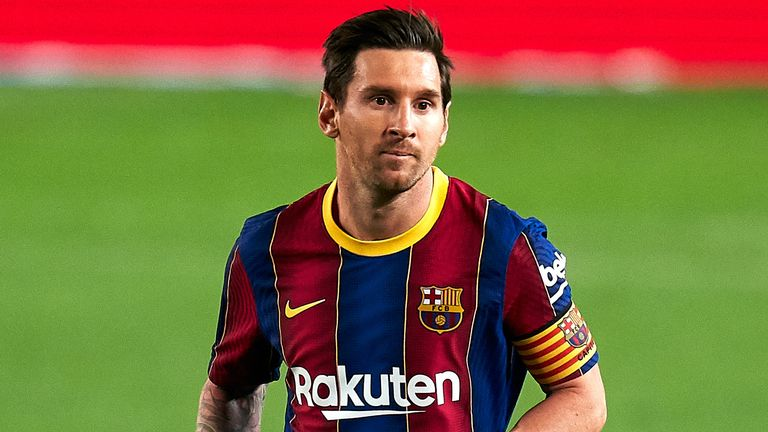

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img1)

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [ ]:
print(classifier.trainable_variables) 

[]


In [ ]:
classifier.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
reconstructed_model = keras.models.load_model("my_model")

In [ ]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 3,506,153
Non-trainable params: 34,112
_________________________________________________________________


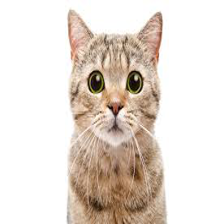

In [ ]:
IMAGE_SHAPE = (224, 224)
gold_fish = Image.open("/content/download.jfif").resize(IMAGE_SHAPE)
gold_fish

In [ ]:

gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
result = reconstructed_model.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

282

In [ ]:
image_labels = []
with open("/content/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'tabby'

In [ ]:
!zip -r '/content/file.zip' '/content/my_model'

  adding: content/my_model/ (stored 0%)
  adding: content/my_model/variables/ (stored 0%)
  adding: content/my_model/variables/variables.index (deflated 79%)
  adding: content/my_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/my_model/saved_model.pb (deflated 92%)
  adding: content/my_model/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/file.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import requests

url = "http://3.90.84.34/classify_image"

payload={'image_data': '"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFhUVGBUXGBcVFRUVFhcXFRUWFxUVFhcYHSggGBolGxUXITEhJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGhAQGi0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAADBAIFAAEGB//EADsQAAEDAwIDBgQGAQMDBQAAAAEAAhEDITEEEkFRYQUTInGBkTKhsfAGFELB0eFSI4LxFXKiFkNiY5L/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAmEQACAgMAAgEDBQEAAAAAAAAAAQIRAxIhEzFBBCIyFCNRYXGB/9oADAMBAAIRAxEAPwDzSlSRlNjVj2LynK2PbppgLrJlmnhb07IRn1FnKXaQ20abUhadVlBJUHOhJRsiw/eQoioTjz9OJUKQlWOgoCZOMe6tJFQjs6K41SpiU5rNBseW5iCDzBEgrbadkuITjToXbKISUzQoEgnAwJ4nkoOYRnPyR8FeNqOwvJUC0o5YttbzSRFCb9OcqdKl0TpcsYVV0OhV9IrBTlPVLhANMhMYuaNkJlAlOhhRGiEWDERpIKO2yI+qguEouxeyNZ6A5ym8QtWT1FQOCUCmy6bYUEZW+P8AFgiBopeoCDCeN1DulhdEsTZTQ3NhWL2ABI1BKpOxEWOlSqPhRDIS9V91aVsQZgByhVmBR7xD7xWospJkDSWKYK0r6MuDUW2VUi16muXQhPo/36056XawqUFJRRaJuciNutUmSjigZSYzbRCc0ri6k8NyHA+hBj6JV1Eq6/B3ZJrVXU4yAd02aATJPOx+SSaTtmmC/Igmt0jjTY79TGDcBykkewI+aR07C4hrRJP3PkvUDQ2xSpsaG0wPHIn3iZKV/JUnF0taCbbg0BwnqFz+a21R6GT6ZSe1nAdqy002gw0NBmOLskofaT7t/wC1vyEfsrLtzsmuKZBAPcy4EZc0YjjGSqvV6d24gmYDQOQ2tALZFiZk+oXXKnFGWZftgaKJsHFaoMhMmlKzuji9EBTHBRNOEzRZAS1d10tgswjihudK2WFQay6LFYwBZRrCyJpgeKBr6glEXYexQMum2UxCHstK1TrQtCqpA9TSSvdEKzrERKWaQUbUQ2KtUHMumnsEqAbdbwf2sDVJsZW3FMPp2QHkBc9jaE9Q5A3BMagStCgmZtC9QoT9PZHNO6lUbwVKVCRX93CC6kn3U1EtELVTNbEu7WIxasVbCsZc0IjAlqL7plwWEucMwjHp6hT3JAOAT+kqKJXRqvRLuIKaDVKoVCm9YW2TQRlErofwzRrkw2G0QJJEBxdPEi+BF+Bt1pdPWpBw71+1vICXO6N5eZx1wus7A7WZUmmzaGtw0W45cCZcfOVp45uDdcOn6WlO2IfiDt3UMdtosc7xAk8PPqLlZoe1K9WAaO1xMeEk25kRI8l0X/Te9B3GAY8Yi3+3l5KWlbQ00tY/fUInxCCfWU44rilX/Tsnl1k3Yj2zTrGkAJa9sAPgkXs5p9OCp6nZR/LQPE6m5xPMtPxEDpE+67ylrhGy7hHG5vfMXSNWg1viiC7cRPQyP4UTi4+hJrItWeaNYjsKP2ttbVcGi0z5TkDpKULScKG7POlFp0w7XhAq0uKGaRUK9UtUu7JDtIwtliQpPJKsGsJC0iVEj30JCrcpw6dLV9IVpEaCOPhhB2dFFocDdPtIhNuvQ2xbYYWhp7JsuELdJS5EMRZp7qFJniVqaYhV9JniW2N/awaB13ckkWmVcmglqlJYwmlxjToSq0rJcOhPlqUrUjKtSTJuyLmSlK74TT3wEi47iqiuia6Ta+QlqziE1ZZ3YVJ0xVYhK2mjQWK90FERSgptosotu6U+YLYCiSs2WIr+4kpyiyEfSUoymi1qlorxCxeThba0qwZSa0LT2ThToheMrO0uyhXbc7XDBj/xd0+in2TqPyhNMtcXWJLQ52cA8vJXXZ9P/UYDiZPXaC6PkrHvGw5+0T4iOrrgZ8gunE3rT9GuPBfROr+LaopltNpY0SHPdG9zrS1ouJAMybWS/wCGNBW3GrWqVHueDYkmJINpwBEep5BG7L7Gaabnbi5zSCbbom8tm5uOUi0c0TT9sUKbtrqw3cocB7wk5fERvWztezhtGfnYKFfXB255w0FrAMugWAHUx8lzet7acW7aY7xxsGgwBzL3YjyVr2Bp3FzalZwLmiGtbZjPIZJM3J+SwlGzSLouNN2PSqUWtrsBLW3fMHcRJLT5+i5PtfsJ9I+CXtOMAjz5+Y+S73W6toZJsLWHE34cVy7K9WrWG6AAQQ0cATJk87QuefGarDHIunLdxUafGxzf+5pA9DxQNTS3L2mrpWuYIAsDFoj2z/a5PX9kse6DTAIyQNpPU7US4+mEfp1L0zgKFFGcwhdiPwzSB+J49oHnZHP4YpGQXuIHKB+yacQX0rRw2mcJklTfVEwuzH4N0o/z/wD2f2TFP8KaMYa4/wC9/wDKpah+nOEfRB4JbaBZels/DOm/xPSHu/laq/hHRm5BH+9/8q00J4TzUUZuiNYcBei/+k9Lhu4Do4n6yq7W/g4tk0qno8fuApaiT+nOEqOLSl2VPFKudf2HVpkmoBHMEEf16qmfoXTbC3hVEvFQxSryVOpBUNPROESvpyLrCWKvREsYpUMFLvcoVajt2EQUXFOOJ0SsTE67ZS3cK0q0YGFHu7K0mkGjRVOp3UnAhHq0CCgVyVVktAC8raFBWK6RI/RcAisJS7LFbfUMqX06LLBrjCLRKrw90JmkSLqaD2Ph6Ka4CRdqQPNbDJgooaH6WpO6R1HoRBRu+JEWAuTHnZVlYxhS09QyjZrhcZtKkdD+FdUG19rsPBb0k4+YV7qey6bjJAP/ACuMc05B69V6Foa4qUGvF5AnoQIcPdVF/BLfRD/pzMNEHEAfwrTRaTYOvM8P5UNJQvuPl59U3ScCYWeRtG2NJkX0JEkyeZ+gHBLaZoYZHH+k5zBtPn6JJ9I94YvjN1zV06k6R1+jrywKn7Sf/qGD/Fx/KPo6ptIxxvKq+0a25ziPrBt9/Jb5HcUYY/yZM1+Ki2uRP39/2l2ice1vPijMGJ/uyySNmzVTUnj736LdOsef35odSkOF/nCBUqQqoVliapPH5/19ysZVj29PoqwV8/JQra1OibLtupgHl7KVOsevtY56+iqqVcmLe0/fJMkkcPqP+UqGO6h1N1ntn2n5Lke2ewS0l9HxN5YjyXRmpODfzt9Eu4Pxe/t0vZGzXUGqfGee1g4G4g8jlMNIc25XS6vSs1DDPhqM3CY/U0wQedwVxFeo5rtpEQYIWsZbHPkx6/4Os0wUKI8UFKVNaWBJP15mVaTRki11DBKUqBK/nZ43QX1yjWQnY9UIIwkqzQSguruKDV1MI0kTTGNjViQ/MhYq0Yg7YlEFyknAgpwC0hKiUSi6eZcWQKBAF01YCxSLQOnTE3CsBtaEoxpKMymQZSsCVa94WUaFpWtTWPJE09URdSCXRnTUpGV0X4U3batMGw2uHrIP0C5proNjZX34Tqj8yz/GH7o/x2k/UBVH2NnTd7NMAcyLdPsIbHuBxA6ZPmrLuQJeMAEqO0OFvM+aeSDZrjlQCqZAPE/cKOjoAunp0PRaOfv90Q1Iv1+/Jc+vTo24OVDGPXHuFUFwmT5p3UVXRI/dJveADOVpJGUZUYagHH7C3+a+/L1VXWrEn7/ZLmqR/aSgXuXH5nqfW6G96qxqPu/ss/N8yQOguVWpLmM1b8gOaFSaJsQ71+wUtX7Sa1tmmBzJPvwUdH2jucPDt+SrxsnyHRsoC0A/MHkmHsPM/Pl0yp6eqCGnmOGVOq68/wArKSNYuw2jojj7cFldzTYDjm3oo94eNvW3ko1a0ff8ooGxDtLSd1Va/i9skXiRxB6gCy4n8Y6eKoe0RuFx1Fv4Xc9raveKbZ/92PQsOD5hc/8AjSi002xkO+RBmfUD5q6p2jKU7i0cPVfIhLuA4p9tGEvX00q1I59mJO25CjUqGJhMU6MSl6tUgxFlWwNiR1JNkKpTJKPUbeYU+/AGFV/wLom6gVin3xWk+iLTuxxRdMWyoNZNyi6drZssjQI4gnFlJtMF0App1EZkIPdgfDlKwY0+GCFOlWlsRdAc0xdEdMRhJg2SazmhajSEkFq2H7Be6a079wlISM/KSACVadg0wyuwnE7T/vBb+6rjTPNFpNgZv5pr+R1Z22nr3LSTYR6ck1qKuxuMj7suWqdp4qnyffDufkf55K67/vKQcL8j8pWt8CPslQB+I/fVaq1r39MfRKajWhguq+p2iCxzzgAnl6e6wq2dDdIe1HaltoPi/ZKODickqm7OpVHPNR2SZvyV47U7RmfZdGhzbke6d98ECtbJ+f8AKjU1/X79EjW1gsk4pD3YxUq9f6W6NUYb75PtzVc6pP3yVh2bq2tLRDZniYn1KE0Jtm3aR93EEAdfZcvrKj3PcNxDRaxtnHVdz2vrGlsF0k8jYeS5d9Fu4QJ6H4Ryt/KtySCP9nX/AIP7Q7ygCTLmFzCYuYgjhyMeiuGVASOhXI/hWu7vHUz+oSOFx/R+S6VjS13ij6rmn1nTjdocq1uX8pYAuwfdSLSYA4+ie/KbWzP36qEVI53tjUgVKFNv+RceYgEfv8kX8XaedNub+naY6SAT9FQV6pOsJ4CPlA/ddJ2q5z9LUH/1ux5EifvgtXVGCPNqtZ44KFCqXTKaFIxCE/TkJJGdClaoQUpqHSU/WO0XSZqNdYC6pIQsyoRkIWpqdE08AWWnERhWDuqEAyViKSFidiplkainRPKy3TmbiygdQN0AGBxXPYrY60CMlDZTE2N0xR2vtxR6NNoGPFzRsVdmUafByIaHVZTBJuEQgt4G6TkLYG5gcITNCmAPJPdk6JjzLjC3VADnARGEtikuWytc6fJbJACbYwTwAUqtNuQnZOxnZdJryab7NqWnkcsPvHur/si1KpRi9Mgi3Akz8wfdczWk4XVCN5qD9VKTHEuLCtIyuLRePskVOs0bnumDf2RtV2U9unJgHaWk8Lf8kI7dS9zrfC3hxPVQ7U7ScQGme7J4fqjy4Sojfs6MjVUUtTWujbEdJBH0slK1V03PzTT2guJi3VQ7lV5GcgvVJF5W2UDEolSlA5qbPhhQ5BaFSHKFOjIurFtN23oFgoggkiEWJyorHODTACkxrplWTdJPwj1Q62nMW4J2NMzs7Vd3VZU5H6gj913L7tFSBBE2x/S4Funm8YXT/h3tMCn3Lzf9J+ifHw0xz1ZcUHN4z0IUquvvtyLpLU1+E/0kKNU7onxGc8iI+sH0WTs7KTRVa5g/MucPLhy+fqui0R7yk5scCL9QcrihVJfuJvMldR2LqIO0mxOPP7C0crRy46kzkKzHeyTqB6uu3dO6nVc2DBJI8if2x6JGoSG2uhMiXHRX1WyIKU7jaJTrtxS7qcmJVbEWKPpHK0+qLNhHryPDhB7gu800xXQu5olYtwRkLadhsdG/SNIhsjmhU9GRaFujr3SQ5uOKO3UmZkjouUHKLI0dDBsMp8aOB1QDUu0zB5JqnqXcxYSmmhqUEZRpvFosmiwyJCgzVk3n0Rm6u4BcE7QvsImiTgQVr8lbxFFOrPAqbtQYmJ80cKqIGlpJsiO0JDVHv8mYOE3Sa4RB3HKODSVFbS0b5N7K2oSKLpuWgj0kEfQ+yz8yG5EkqejqB+9oGWH3H/JVRaRcKtCfZOrN2n75I+pqkuhsQAAJ8lWO8LnQbzH1TQeRbbjjzVNpIrI18iGt0Tn2JII4hbZSPHgrOnq54LbnZIbPFZmPGVrycbcrbquweJhI6Jujq/8AIXR2uBafuEcslxiVzpIsDBW2udMG6apl0ho+ihWa5pEoFUQb2ls5Soc4qxY6bn28kF1RsdJtNkgaXwLVZAAFkFjsQm6teTAhEDWngkOk/kaFYvZI+JuevVLvDnAOaTvbeJ+IfqH7jyQadYNJLQQeM4I5J3s8uDt1y2R6Loi1JU/Zvjm/RV9pN2Eu22f4m/uPMGR7LWk1hABiDiF0vaGjY/8A0xYOO6mTgPi4PIO4+h4LndQGh21wIcJERgixlYv7SJftytFse1aNRuyqAQLgzDh5FUWtbREik8njtdE+hET7LT6LHZB6IOnoU2+LbMYkKf8AC5ZYTXV0SNze3VQqm4EY4p3V7XNmAOKTe4WlVZyC76QcYj1SwplthKe3gmyiHhuBnmnbGVxY1bUajDJWKwplvSJmRtAcOdwh9+XASb/KPNapUouccRyRDSG1oIIkz5A2nrcH2XPaItBqbpviBkmQfJMUBuMmcQt0KTmXlm08x0m1uoQ6dElxO4AAE3/xEJpoY094EEAjgRw81tp8Qlv8nopVILQ0OJkbugBP0UiIwQbDEx80bId0G71htBEn2TFoALjHS6SJls8IvGJtlEBAbMwbE7pwcRCG/kLJ0vCBeSTeRhEFUg+F3Q+q013iDntlsf8AHkpOpAje4BsHwgSZ9pTtDTRoTcTk4/dWPYjwHOtgfOQkjuJMARyMbvIJns4Q92QCOIj3vlBpi7NFcPFXaDjcXHyBH7AotR9yDwkX6FFbRd+YMAbTTfnoCTfnceyJrqY3jxNDXAO6yR4pnrK6MkPsTRWZ9EmakFwaIRajIIk55LKLmtJMSBg7fCRj3UKmoBqQRYZGAOoWMqXozdJcJv8AGPCLxE4xxKCahjlz6o1WgWEhrotN+XBQ0g3CHAkGcdMHyUX0k3TLucdf2QnbheZj1TTCBdwMtzFgBzPFCc5tiDZx4STHQFMCWpaGNB3zLZkDBPBJtpFwuJATldjXg7ZO2cix84UtJTHw4gEmxJdjwgJBQpR2QTDpA4cSi0t0EhwPTiVGIcQGOMTgc8CFjyGmGgkwOgE5CbVBYPvGuBgiRwlMdi63Y+Tdps4dD/CXbSpUqhIAM5gcclTeGmXARaRynihNp2gunaOo1WxrO7JxLm39S2fO4XK9sa5z6gJADg0AuH6xFiRzEe0K5NFtSiypMuALeUltseSoXARuLYv9Mq5u2dmRrw2KF5kBxgf5IraZLDDoAi3FCFcFzg5s4LSJiTwhBbX8WxrZkxHXiJKnqOGwWoBB22jJIUdYGkAtj6JoVaYkQTGeg4gFKOcHkta10A2iT84vZHQsVZUMbtuLWWVgOOTwzCaDgA3vNwaDYDnxQTHjuYyJgkg4KbFYIU6fM+yxSLBznrhaSsWyGWaxrZLyRa5AEg26zmf2hE0lWXGxLiD1OOo4Z9Skm0AGzgCT4cWu6A7gDOOfot0yYDQ1tjieszObSfdN4og/ZY23tabG07iNok3IDTi4+aizVOb/APKMG0Zi5ETxseqX1NcF143WwCSG8OcD6Sm2VpAY2zh5ncJJuOJyZ5jqp8dIfSb6xcTuEOFsjgMABOGo1zdoa1ojDehuXOcVUlwJcIkRaIBtxjpHE3lOU32AHiJAFmlsbhBk552zYKVjEWVPVeFu0EDhcAQG5nyjrPJQGsa8lriTtBuACTj4jzv93VfqXkESXbfFYkiHOII2gi4I9boTGG5kDcD4hO0F3EWJgeK2RHNXoMtaWoaHfDY4BJabcSDjgI80ajrdzi0x4PFuvN83mCq+uCKZ3SBdoMAiRNjx59ZJU9O1pJEOiPFEfpgCb+EfF/yVKXSh9zgQ5zHEkxAg7rwPFwF/qm+yKToqkj/Ecos4kcwfhVK1j3A7WkNmImdxuWzeIJvNuMSAV1/YOjZT0Qe+o0OrFztpMwJDWiMiPCD1cVpHFb4aYmoytnPtrVHOeWMcWhpaSYABIMTORbhzS2kfUlwqkVS3wglg8AmdoPmDfKsn1yHbQ87Z8TIES4gNc4gcA0+yptXqnAvc0jxuNo4E7QPXbPD4gtcretIMkrZZd5IhwlowNwte4LgTPFRNMNeWNJuDPOR8QPC0G3RV7daZhwBExJ6fETa9zy4oTiQRfqCA4QRIgXmOkcVyyi0QPUi0HaHbzk2IBaed5Fout1qu1sCIcY2zcSJsOAsq+jVJvkkcDc3MmOUxbjA5olUeARuJLncMAk7N3KYz9gSlZPQgcAA7cJkdSeh4I7nS/BO7kLiBOB7pCpWDmnwt8I4GMnA4uMfYWn6t1rcBkDMGJtb2tHBPWQOyzq6otG3DwQQCCZEXzaM+oRqAaTvHxm1sdRCrS9wgZnMDBm5BwQcFCqVIMcSSREFu4WjqbH3hJRY+ofqaotB3GGu/xgnHMYyPZR02oO2cGSDFsDjPDCXa8vttvMXBcQCQRYeXn5Baq6gtBDhI2xEGZiOHEgY6+adMQalU+La3J8PMgm+EdjwQYcLXFib4yMX+yqqprtu18kR/jMgmAccweGEbS0alU7KEmdznDAABguvjMXj4hGUJSHTo6nsrSk6Yg3ufmJPkueFFjA9pjlcm17kc7LsOydP3OmhxaXeIuIwDM54i+evBef8Abeqmu6B4Z4kC0TujjiOGDwzbTfo6cjrEhpzWuJcSNrfiJOI4gZPoh6iptIa1rbWM/q9zGTE2/kTq5ALovF+TrYB4m4xKjqdTEDJ2iTE7SfhjhtIIHocYU0zlbRgawz4b8YxnPQJfUOBaAAGwYde84Hl/aPXp+HEAOEACAcQQOpi55JWpUgxHEAkRHCATfphCi7FRDVNG0kg5EczPCyC6iXBx2tGOMngcTJPl1TGtrOItJDyCCSPCBJ5Y4+qB3NrTHxNBmXCMz+nOOQJwrSYmnYm1p6jpCxPt0zIvM9GAj0usT2QuhWU9mWiQGvIv8UA2vxGVCi4NDPF4pO3wyG5N90znhjIJWLFMZNrpb9DlDREiQ7c6AbyJlosP3JzyQ3FrvC4Q5x3ANgjIBBm8Gef6QsWLJSbJa4Tq1trWRJOL5gXBHKZJRWvcf9QiWOvaLT8IEmYyL8OaxYq+LBhS5twJJnHWZ487D+IuxSENLBbkb2dtBdjnBv0WLFLfRpghVMTtBDdhg85IMcjJN+igykIc3xEiSIIBkTk4x98VixTKTSCxyk7a3cXRMvaCN28N8DRGMg/F6oTe8DCC0NY48DLpnxgEmIgAzHLksWLb4Za/FhDNV5b8TjLQbCSJiMQTEzCEWy8hwwDuM3M/DHL4R7kYWLFnJtKyQZow4Ehs2BtmYbfPRFcCCNzcHIcTADswTc2a3098WJghrWPAlr24sXNJBi4gg+nNI0qm6HE7hfdJPwiGwPcrFii+sUm2Efp4G1zYMttYgjaCXZzefQBSqNDQ507muEgXEETA+RxF1ixLZsaBUqv6nTgYcTNwSZI6lTo+IudEDaSRIuCeFpnkZsJ5rFibb0sV2jVAtkSMSDtJF2loi4uDzyo/mJ8dw2RIHAkPxJ4hhEraxaJcGQpsEN+GZmzfiO0zflLbA45olDtJ7GkU/CC4gxaQwEASL8SbrSxCdhbJU9WWNABs4yBHiDhPHnzPEHhCDVeHODSI/T/lG4AWJzMzfmVixP8AsdshqqUTE325jBMAZv4oyUvR1ALdrsNPLMnGM2PqsWIj6slBtazb4i4FhAIht9haNkg5jzlJMqEloDGnABJyQN4kHETHpMrFiuwbaYOqTZpxukxa0kdb590TtBwZgHbYXMubJDbHz++eLEl2SRPyRGqxDCbC8gTIzHBYsWKhH//Z"'}
files=[

]
headers = {}

response = requests.request("GET", url, headers=headers, data=payload, files=files)

print(response.text)


["https://images.unsplash.com/photo-1583066196453-da787fb5c0fe?ixid=MnwyMDYyNDF8MHwxfHNlYXJjaHwxfHxJYml6YW4lMjBob3VuZHxlbnwwfHx8fDE2MTc3ODUwNDI&ixlib=rb-1.2.1","https://images.unsplash.com/photo-1600957268258-6f922fa169b4?ixid=MnwyMDYyNDF8MHwxfHNlYXJjaHwyfHxJYml6YW4lMjBob3VuZHxlbnwwfHx8fDE2MTc3ODUwNDI&ixlib=rb-1.2.1","https://images.unsplash.com/photo-1600199919556-603edc0f40e3?ixid=MnwyMDYyNDF8MHwxfHNlYXJjaHwzfHxJYml6YW4lMjBob3VuZHxlbnwwfHx8fDE2MTc3ODUwNDI&ixlib=rb-1.2.1","https://images.unsplash.com/photo-1581864727889-c065732c1088?ixid=MnwyMDYyNDF8MHwxfHNlYXJjaHw0fHxJYml6YW4lMjBob3VuZHxlbnwwfHx8fDE2MTc3ODUwNDI&ixlib=rb-1.2.1","https://images.unsplash.com/photo-1615993310620-415e3b310097?ixid=MnwyMDYyNDF8MHwxfHNlYXJjaHw1fHxJYml6YW4lMjBob3VuZHxlbnwwfHx8fDE2MTc3ODUwNDI&ixlib=rb-1.2.1","https://images.unsplash.com/photo-1594622298859-8389a5f3075c?ixid=MnwyMDYyNDF8MHwxfHNlYXJjaHw2fHxJYml6YW4lMjBob3VuZHxlbnwwfHx8fDE2MTc3ODUwNDI&ixlib=rb-1.2.1","https://images.unsplash.com/photo-1605785721